### IMPORTAMOS LIBRERÍAS

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, classification_report

In [2]:
# Vamos a especificar algunas condiciones para los datos cargados con Pandas
pd.set_option('display.max_columns', None)

# Establecemos el tamaño para el plot
plt.rcParams['figure.figsize'] = (20, 6)

# Y las variables del fichero de entrada, el path y el nombre
INPUT_PATH = "./input_data"
FILE_NAME = "InputOutput_Results.csv"

### AHORA DEFINIMOS ALGUNAS FUNCIONES GENÉRICAS

In [3]:
def load_data(input_path, file_name):
    """
    Cargamos el fichero csv con un pequeño preprocesamiento de carga
    """
    df = pd.read_csv(os.path.join(input_path, file_name), sep=",")
    #df = df.drop(["Unnamed: 0"], axis=1)
    df = df.drop(["caseID", "EnvID"], axis=1)
    #df = df.sort_values(["EnvTime"])
    return df

### CARGAMOS LOS DATOS Y HACEMOS LA EXPLORACIÓN INICIAL

In [4]:
# Y aquí cargamos el fichero usando la función de carga
df_raw = load_data(INPUT_PATH, FILE_NAME)
print(f"DataFrame dimensions: {df_raw.shape}")

DataFrame dimensions: (50000, 20)


In [5]:
df_raw

EnvTime  WindSpeed  WindDir  WaveHs  WaveTp  WaveDir  \
0      2009-02-16 04:00:00      4.509  110.683   1.382   6.873  120.026   
1      2004-07-22 04:00:00      7.064  298.186   0.777   5.851    0.012   
2      2007-07-19 10:00:00      7.368  132.253   1.627   8.606  155.039   
3      1993-12-01 12:00:00     12.858  338.905   2.316   6.293  336.695   
4      2015-10-18 23:00:00      7.546  168.754   1.128  10.624  158.790   
...                    ...        ...      ...     ...     ...      ...   
49995  1996-09-09 16:00:00     12.366  157.084   2.398   7.507  162.833   
49996  2012-11-30 01:00:00      7.675  345.872   1.198   7.464  163.920   
49997  1996-06-10 04:00:00      6.451  351.538   0.627   4.470   52.204   
49998  1993-07-04 17:00:00     11.266   82.560   2.246   7.964   96.410   
49999  2017-01-31 21:00:00     13.771  328.797   2.521   6.496  333.686   

       CurrSpeed  CurrDir       x0        y0     dist0  heading0  \
0          0.150  153.236  643.880 -1380.218  1523.018     300.0   
1          0.186  187.927  904.008  -971.899  1327.335     125.0   
2          0.057   32.381  566.549 -1309.358  1426.673     325.0   
3          0.070   53.130  992.718 -1087.509  1472.468     160.0   
4          0.142  101.864  537.342 -1253.251  1363.589     340.0   
...          ...      ...      ...       ...       ...       ...   
49995      0.009  129.806  537.342 -1253.251  1363.589     340.0   
49996      0.057  213.366  827.742  -936.336  1249.753     105.0   
49997      0.249   78.637  992.718 -1253.251  1598.789     200.0   
49998      0.222  127.954  765.030 -1412.680  1606.529     270.0   
49999      0.328    5.711  984.628 -1067.980  1452.609     155.0   

       time_closest  x_closest  y_closest  dist_closest  heading_closest  \
0              -1.0    643.880  -1380.218      1523.018          300.000   
1            2083.2   1202.317   -534.249      1315.670           61.925   
2              -1.0    566.549  -1309.358      1426.673          325.000   
3              -0.6    992.718  -1087.508      1472.468          160.000   
4             531.4    447.624  -1281.880      1357.786          340.396   
...             ...        ...        ...           ...              ...   
49995         206.4    499.421  -1268.579      1363.346          338.611   
49996        3694.9   1156.660   -263.457      1186.285          127.038   
49997          -1.0    992.718  -1253.251      1598.789          200.000   
49998          -0.8    765.030  -1412.680      1606.529          270.000   
49999          -1.0    984.628  -1067.980      1452.609          155.000   

       DriftDirection_closest  velocity_closest  HitBool  
0                       0.000             0.000        0  
1                     293.953             0.369        0  
2                       0.000             0.000        0  
3                     336.312             0.001        0  
4                     160.745             0.335        0  
...                       ...               ...      ...  
49995                 158.505             0.393        0  
49996                 282.832             0.256        0  
49997                   0.000             0.000        0  
49998                  93.617             0.000        0  
49999                   0.000             0.000        0  

[50000 rows x 20 columns]

In [6]:
# Vamos a analizar la estructura del dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EnvTime                 50000 non-null  object 
 1   WindSpeed               50000 non-null  float64
 2   WindDir                 50000 non-null  float64
 3   WaveHs                  50000 non-null  float64
 4   WaveTp                  50000 non-null  float64
 5   WaveDir                 50000 non-null  float64
 6   CurrSpeed               50000 non-null  float64
 7   CurrDir                 50000 non-null  float64
 8   x0                      50000 non-null  float64
 9   y0                      50000 non-null  float64
 10  dist0                   50000 non-null  float64
 11  heading0                50000 non-null  float64
 12  time_closest            50000 non-null  float64
 13  x_closest               50000 non-null  float64
 14  y_closest               50000 non-null

In [7]:
# Define predictor and target columns
#target_cols = 'heading0'

# Train - Test splitting for target and predictor cols
X = df_raw.drop("heading0", inplace = False, axis=1)
y = df_raw[["heading0"]]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_input = pd.merge(X_train, y_train, left_index=True, right_index=True)

In [8]:
df_input

EnvTime  WindSpeed  WindDir  WaveHs  WaveTp  WaveDir  \
39087  2019-03-11 04:00:00      5.365  323.394   1.654  12.373  110.432   
30893  2014-07-10 02:00:00      5.764  288.826   1.289   5.872  205.642   
45278  2012-02-23 07:00:00     10.673  109.004   3.229   8.585  103.253   
16398  2012-03-21 21:00:00      3.814   92.227   1.286  11.986  108.571   
13653  2004-07-21 14:00:00      7.442  322.976   0.947   4.248  334.802   
...                    ...        ...      ...     ...     ...      ...   
11284  2008-12-29 14:00:00      6.590  333.326   1.128   5.773  335.737   
44732  2019-02-09 00:00:00     12.339   24.133   4.152  10.312   20.812   
38158  2014-06-09 20:00:00      2.000  298.969   0.346   4.889   53.504   
860    2020-10-18 23:00:00      5.038  126.400   2.166  12.593  166.352   
15795  2003-12-07 21:00:00      8.555   97.157   1.310  10.895  132.630   

       CurrSpeed  CurrDir       x0        y0     dist0  time_closest  \
39087      0.104  211.734  765.030 -1412.680  1606.529          -1.0   
30893      0.447   57.804  609.283  -984.767  1158.012        9026.4   
45278      0.140   94.289  702.318 -1404.424  1570.241          -1.0   
16398      0.283   94.018  722.955 -1408.999  1583.648          -1.0   
13653      0.186  142.125  963.511 -1031.402  1411.433          -0.5   
...          ...      ...      ...       ...       ...           ...   
11284      0.155  168.690  984.628 -1067.980  1452.609          -0.3   
44732      0.159   76.373  984.628 -1272.780  1609.181          -1.0   
38158      0.201  192.420  537.342 -1087.509  1213.018       10606.4   
860        0.187  135.757  545.432 -1272.780  1384.726        1055.9   
15795      0.337  118.341  682.159 -1398.068  1555.613          -1.0   

       x_closest  y_closest  dist_closest  heading_closest  \
39087    765.030  -1412.680      1606.529          270.000   
30893    756.016   -658.863      1002.826          147.089   
45278    702.318  -1404.424      1570.241          285.000   
16398    722.955  -1408.999      1583.648          280.000   
13653    963.511  -1031.402      1411.433          145.000   
...          ...        ...           ...              ...   
11284    984.628  -1067.979      1452.609          155.000   
44732    984.628  -1272.780      1609.181          205.000   
38158   -283.038   -259.717       384.140           70.926   
860      160.979  -1350.081      1359.644          250.794   
15795    682.159  -1398.068      1555.613          290.000   

       DriftDirection_closest  velocity_closest  HitBool  heading0  
39087                   0.000             0.000        0     270.0  
30893                 311.245             0.061        0      50.0  
45278                   0.000             0.000        0     285.0  
16398                   0.000             0.000        0     280.0  
13653                 326.543             0.000        0     145.0  
...                       ...               ...      ...       ...  
11284                 328.867             0.000        0     155.0  
44732                   0.000             0.000        0     205.0  
38158                 227.465             0.164        0      20.0  
860                   173.201             0.722        0     335.0  
15795                   0.000             0.000        0     290.0  

[40000 rows x 20 columns]

In [9]:
#Resumen de los estadísticos
df_input.describe()

WindSpeed       WindDir        WaveHs        WaveTp       WaveDir  \
count  40000.00000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       8.54966    166.561924      1.995501      8.152695    151.193417   
std        3.83190    107.039218      1.097943      2.451467     92.048997   
min        2.00000      0.025000      0.094000      2.056000      0.012000   
25%        5.61100     76.321000      1.146000      6.365000     85.869000   
50%        8.30300    148.520000      1.784500      7.776000    141.587000   
75%       11.24200    278.220250      2.633000      9.459000    175.469000   
max       23.51000    359.995000      5.498000     23.696000    359.998000   

          CurrSpeed       CurrDir            x0            y0         dist0  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.210291    151.077602    749.989762  -1236.993514   1458.244815   
std        0.108216     91.554974    170.377466    158.172776    142.146356   
min        0.000000      0.000000    522.730000  -1412.680000   1156.084000   
25%        0.129000     86.251750    579.417000  -1368.861000   1342.558000   
50%        0.198000    142.472000    743.912000  -1272.780000   1467.197000   
75%        0.279000    189.207250    920.777000  -1128.305000   1595.765000   
max        0.781000    359.891000   1007.330000   -928.080000   1640.430000   

       time_closest     x_closest     y_closest  dist_closest  \
count  40000.000000  40000.000000  40000.000000  40000.000000   
mean     500.865390    703.290866  -1135.717383   1396.342814   
std     1313.813784    302.694536    390.943748    281.345582   
min       -1.000000  -1072.017000  -1491.650000      3.177000   
25%       -1.000000    566.544000  -1373.462750   1326.590750   
50%       -1.000000    743.912000  -1291.530000   1467.197000   
75%      561.725000    963.511000  -1128.305000   1595.765000   
max    36000.000000   1369.871000    392.255000   1640.430000   

       heading_closest  DriftDirection_closest  velocity_closest  \
count     40000.000000            40000.000000      40000.000000   
mean        229.986183              107.765780          0.205879   
std          90.296249              119.056282          0.355158   
min           0.017000                0.000000          0.000000   
25%         180.000000                0.000000          0.000000   
50%         245.000000                0.000000          0.000000   
75%         305.000000              176.348000          0.342000   
max         359.987000              356.165000          2.075000   

            HitBool      heading0  
count  40000.000000  40000.000000  
mean       0.010525    231.386000  
std        0.102051     94.831483  
min        0.000000      0.000000  
25%        0.000000    160.000000  
50%        0.000000    255.000000  
75%        0.000000    315.000000  
max        1.000000    355.000000

In [10]:
# Comprobar si existen valores faltantes
missing_values = df_input.isnull().sum()
missing_values

EnvTime                   0
WindSpeed                 0
WindDir                   0
WaveHs                    0
WaveTp                    0
WaveDir                   0
CurrSpeed                 0
CurrDir                   0
x0                        0
y0                        0
dist0                     0
time_closest              0
x_closest                 0
y_closest                 0
dist_closest              0
heading_closest           0
DriftDirection_closest    0
velocity_closest          0
HitBool                   0
heading0                  0
dtype: int64

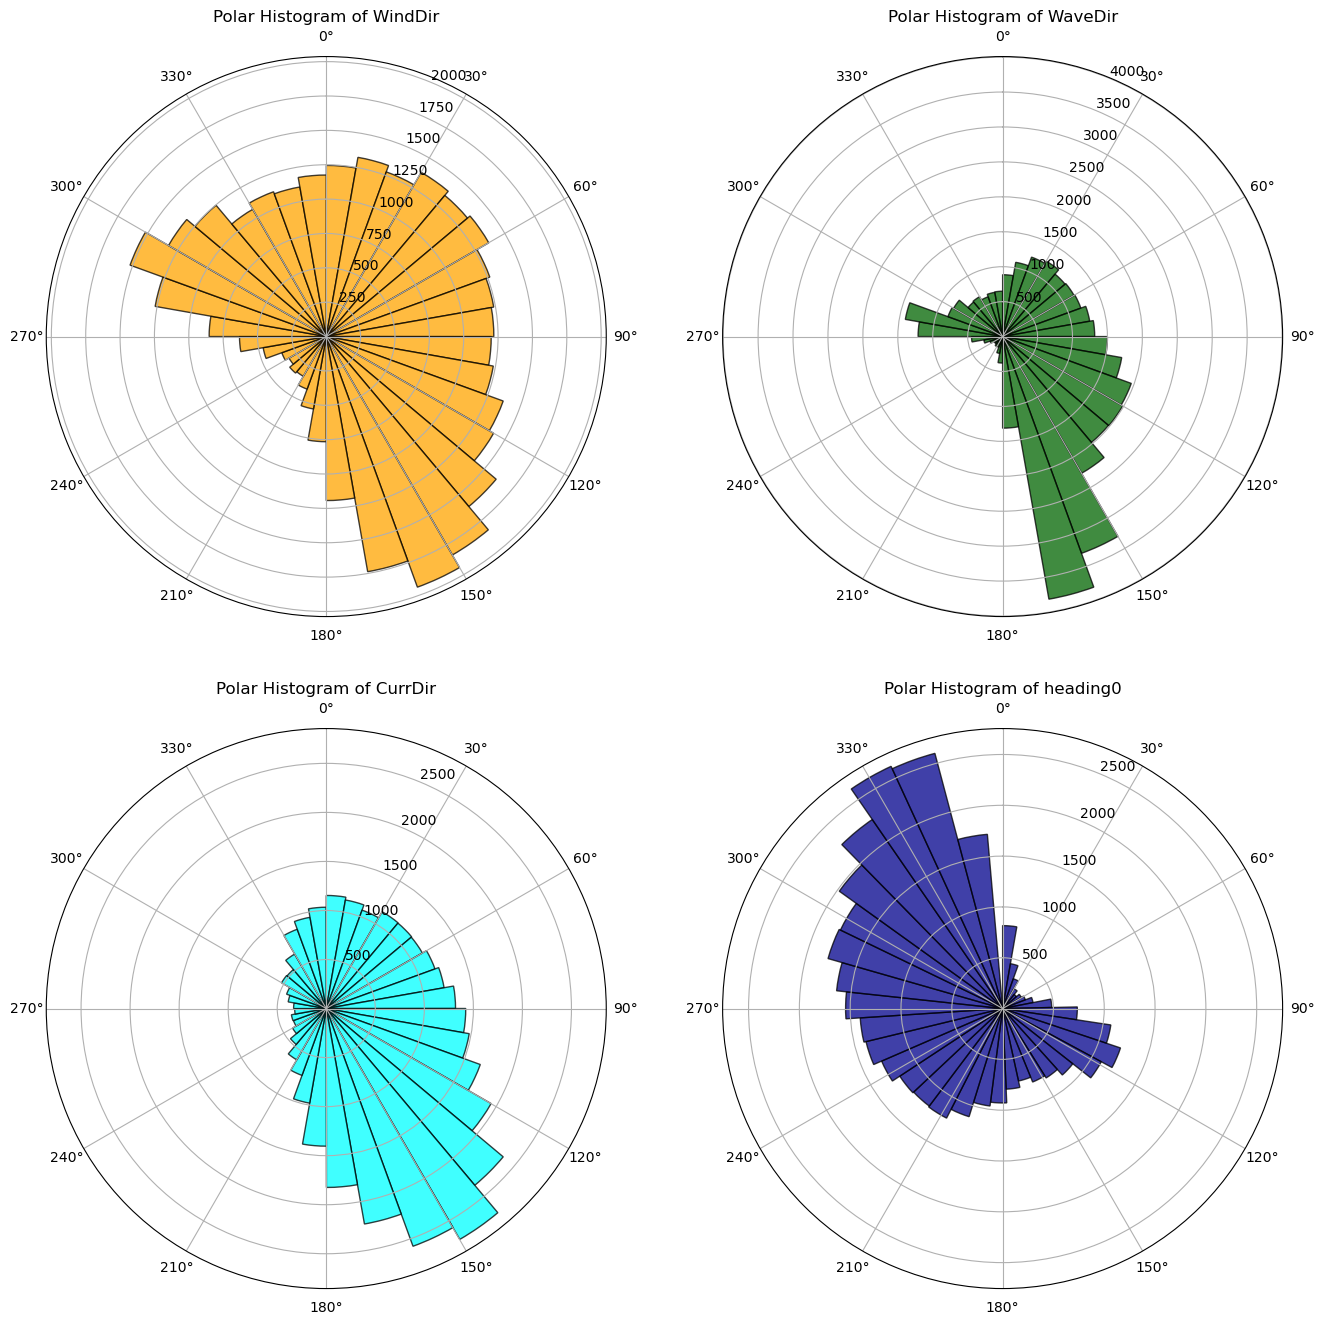

In [11]:
# Convert WindDir to radians
wind_dir_radians = np.deg2rad(df_input['WindDir'])
wave_dir_radians = np.deg2rad(df_input['WaveDir'])
curr_dir_radians = np.deg2rad(df_input['CurrDir'])
heading0_dir_radians = np.deg2rad(df_input['heading0'])

# Convert EnvTime to datetime
df_input['EnvTime'] = pd.to_datetime(df_input['EnvTime'])

# Plot polar histograms
plt.figure(figsize=(16, 16))

ax = plt.subplot(221, polar=True)
ax.hist(wind_dir_radians, bins=36, edgecolor='black', alpha=0.75, color='orange')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks(np.deg2rad(np.arange(0, 360, 30)))
ax.set_xticklabels([f'{deg}\u00b0' for deg in range(0, 360, 30)])
plt.title('Polar Histogram of WindDir')

ax = plt.subplot(222, polar=True)
ax.hist(wave_dir_radians, bins=36, edgecolor='black', alpha=0.75, color='darkgreen')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks(np.deg2rad(np.arange(0, 360, 30)))
ax.set_xticklabels([f'{deg}\u00b0' for deg in range(0, 360, 30)])
plt.title('Polar Histogram of WaveDir')

ax = plt.subplot(223, polar=True)
ax.hist(curr_dir_radians, bins=36, edgecolor='black', alpha=0.75, color='cyan')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks(np.deg2rad(np.arange(0, 360, 30)))
ax.set_xticklabels([f'{deg}\u00b0' for deg in range(0, 360, 30)])
plt.title('Polar Histogram of CurrDir')

ax = plt.subplot(224, polar=True)
ax.hist(heading0_dir_radians, bins=36, edgecolor='black', alpha=0.75, color='darkblue')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks(np.deg2rad(np.arange(0, 360, 30)))
ax.set_xticklabels([f'{deg}\u00b0' for deg in range(0, 360, 30)])
plt.title('Polar Histogram of heading0')

plt.show()

In [12]:
# # Convert EnvTime to datetime
# df_input['EnvTime'] = pd.to_datetime(df_input['EnvTime'])

# # Extract month from EnvTime
# df_input_plot['Month'] = df_input['EnvTime'].dt.month

# # Convert WindDir to radians
# wind_dir_radians = np.deg2rad(df_input['WindDir'])

# # Create polar plot
# plt.figure(figsize=(12, 8))
# ax = plt.subplot(121, polar=True)
# ax.hist(wind_dir_radians, bins=36, edgecolor='black', alpha=0.75, color='blue')
# ax.set_theta_zero_location('N')
# ax.set_theta_direction(-1)
# ax.set_xticks(np.deg2rad(np.arange(0, 360, 30)))
# ax.set_xticklabels([f'{deg}\u00b0' for deg in range(0, 360, 30)])
# plt.title('Polar Histogram of WindDir')

# # Group by month and calculate the mean WindDir
# monthly_wind_dir = df_input.groupby('Month')['WindDir'].mean()

# # Convert monthly mean WindDir to radians
# monthly_wind_dir_radians = np.deg2rad(monthly_wind_dir)

# # Create polar plot for seasonality
# ax2 = plt.subplot(122, polar=True)
# months = np.arange(1, 13)
# colors = plt.cm.viridis(months / 12)  # Use viridis colormap

# sc = ax2.scatter(monthly_wind_dir_radians, np.ones_like(monthly_wind_dir_radians),
#                  c=months, s=100, cmap='viridis', alpha=0.75)
# ax2.set_theta_zero_location('N')
# ax2.set_theta_direction(-1)
# ax2.set_xticks(np.deg2rad(np.arange(0, 360, 30)))
# ax2.set_xticklabels([f'{deg}\u00b0' for deg in range(0, 360, 30)])
# plt.title('Seasonality of WindDir')

# # Add a color bar
# cbar = plt.colorbar(sc, ax=ax2, orientation='vertical', pad=0.1)
# cbar.set_label('Month')

# plt.show()


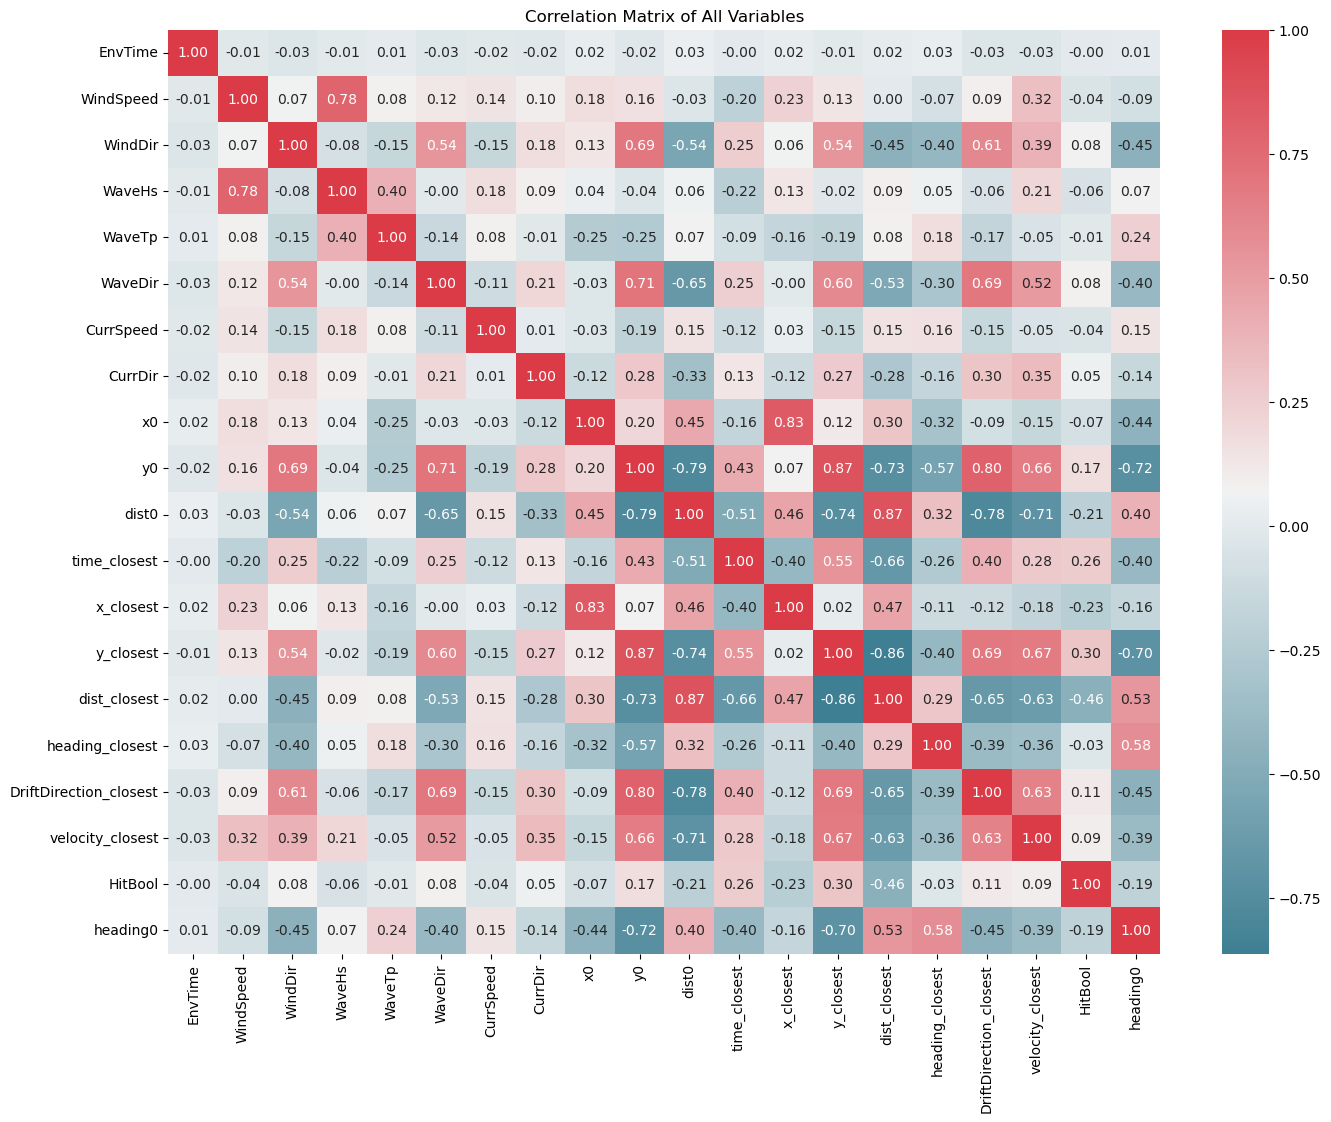

In [13]:
# Create a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# Compute correlation matrix
corr_matrix = df_input.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap)

plt.title("Correlation Matrix of All Variables")
plt.show()

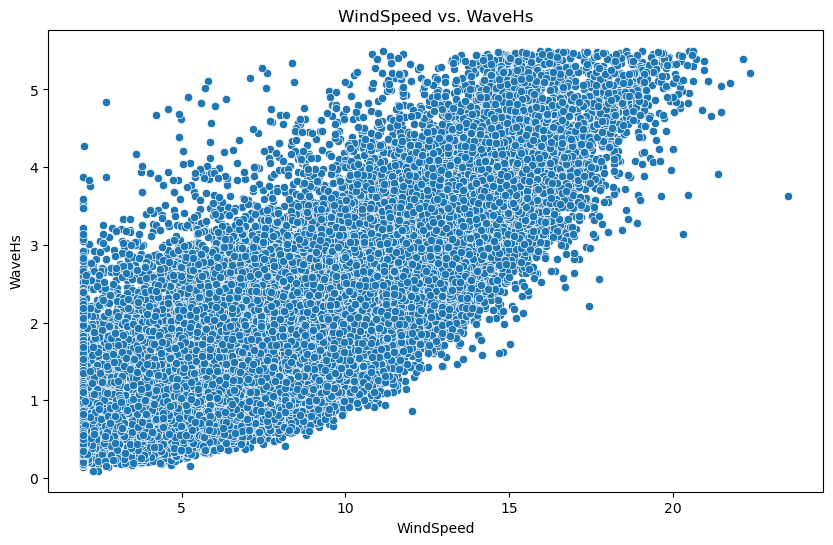

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WindSpeed', y='WaveHs', data=df_input)
plt.title('WindSpeed vs. WaveHs')
plt.show()

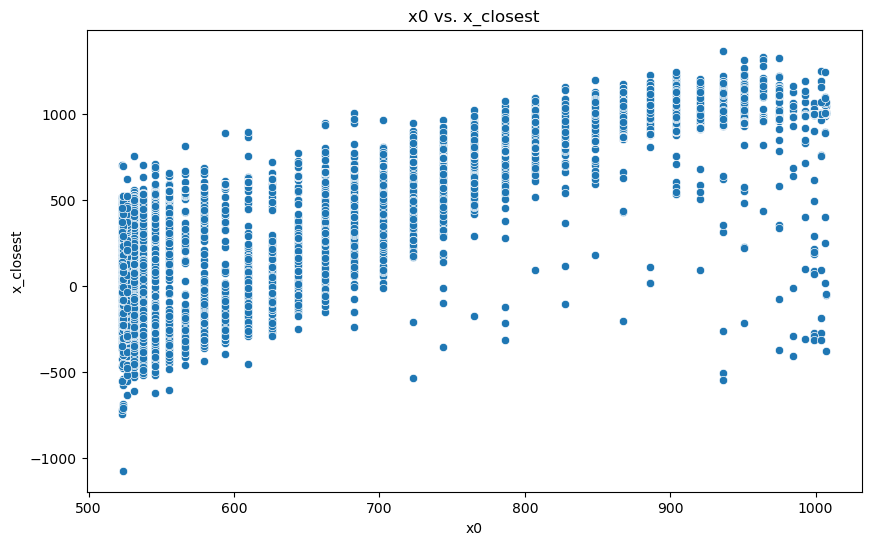

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x0', y='x_closest', data=df_input)
plt.title('x0 vs. x_closest')
plt.show()

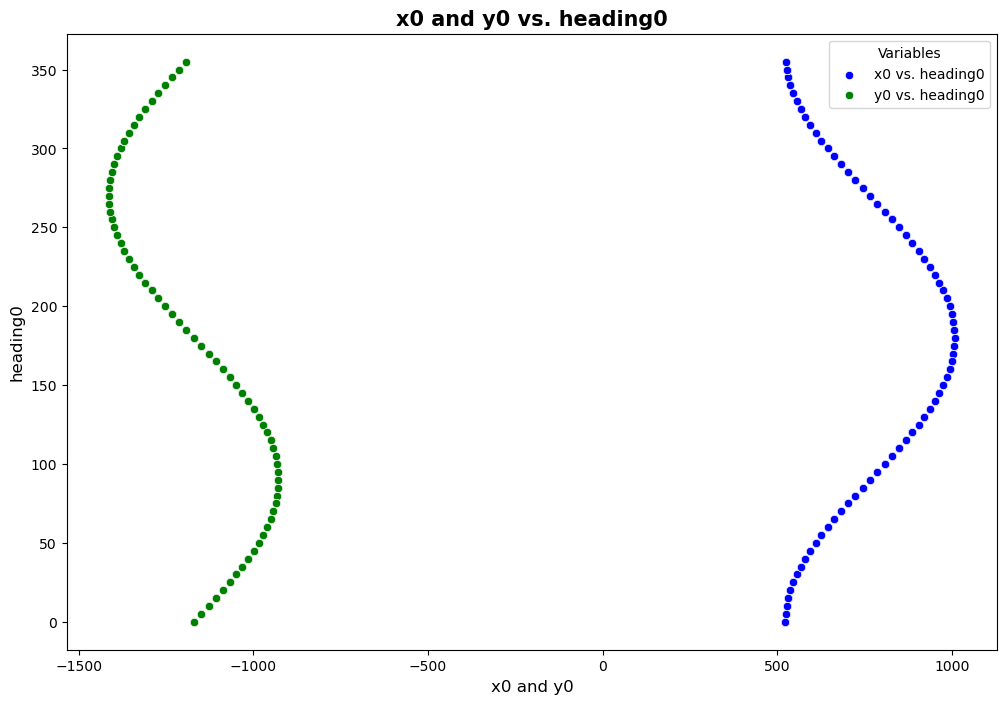

In [16]:

# Combined plot
plt.figure(figsize=(12, 8))

# Scatter plot: x0 vs. heading0
sns.scatterplot(x='x0', y='heading0', data=df_input, color='blue', label='x0 vs. heading0')

# Scatter plot: y0 vs. heading0
sns.scatterplot(x='y0', y='heading0', data=df_input, color='green', label='y0 vs. heading0')

plt.title('x0 and y0 vs. heading0', fontsize=15, fontweight='bold')
plt.xlabel('x0 and y0', fontsize=12)
plt.ylabel('heading0', fontsize=12)
plt.legend(title='Variables', loc='best')

# Display the plot
plt.show()

In [17]:
angular_cols = [
    "WindDir", "WaveDir", "CurrDir", "heading0", "heading_closest"
]


def encode_angles(df: pd.DataFrame, angular_cols: list) -> pd.DataFrame:
    for col in angular_cols:
        print(f" Encoding angular variable ---> {col}")
        df[col + "_cos"] = np.cos(np.radians(df[col]))
        df[col + "_sin"] = np.sin(np.radians(df[col]))
    return df

df_input = encode_angles(df=df_input, angular_cols=angular_cols)

 Encoding angular variable ---> WindDir
 Encoding angular variable ---> WaveDir
 Encoding angular variable ---> CurrDir
 Encoding angular variable ---> heading0
 Encoding angular variable ---> heading_closest


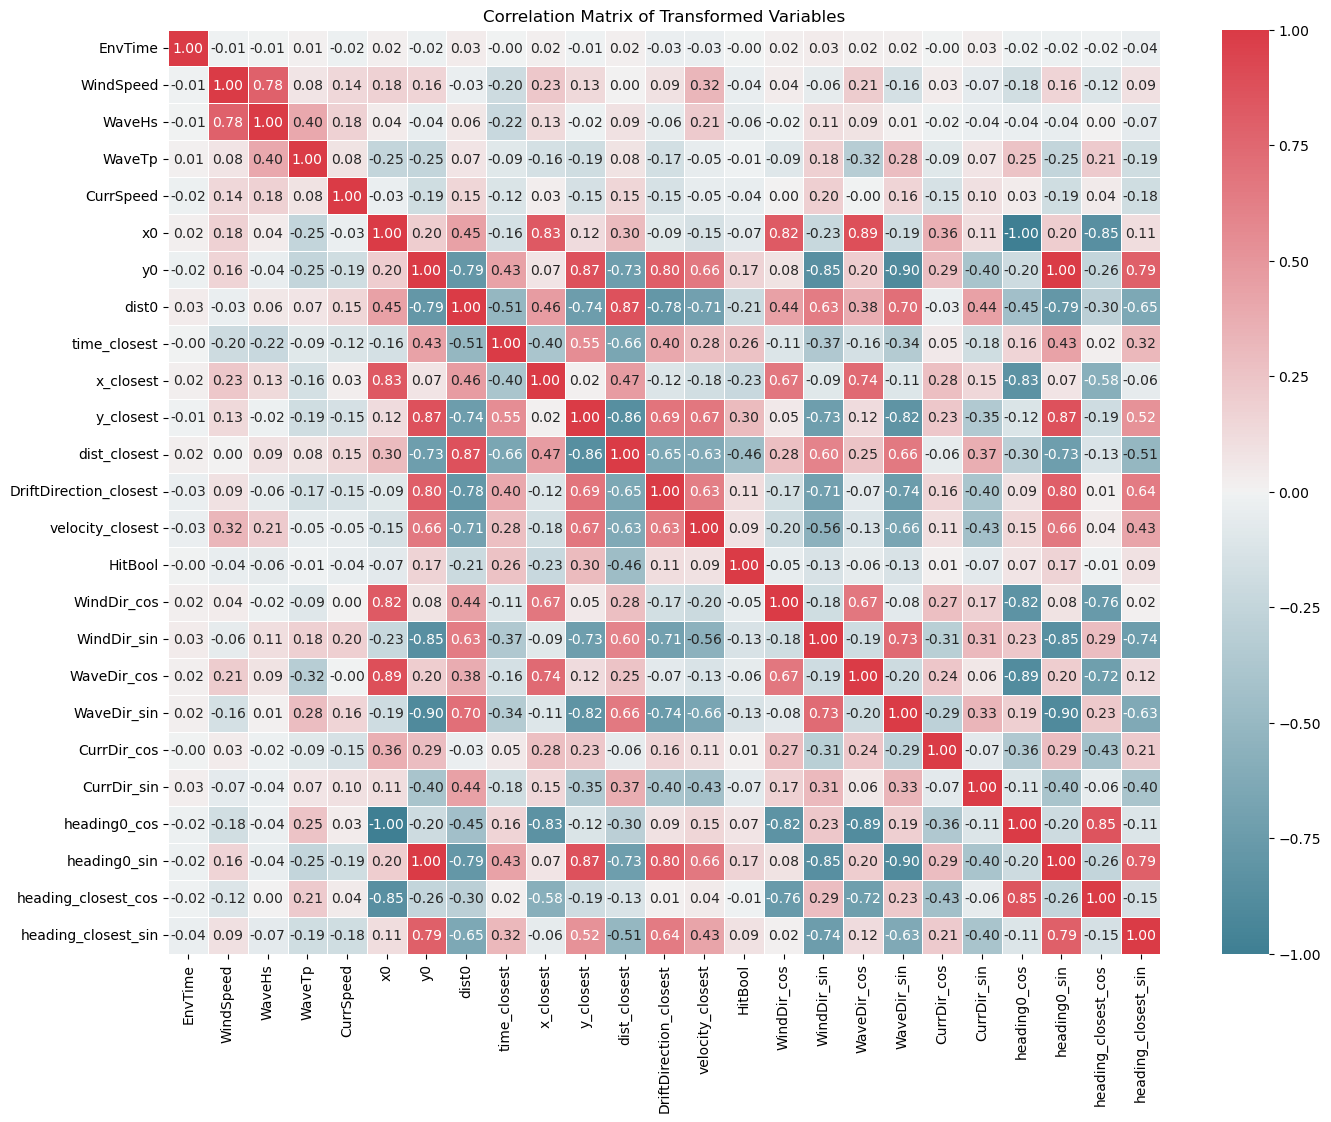

In [18]:
# Drop the original directional columns
data_transformed = df_input.drop(columns=['WindDir', 'WaveDir', 'CurrDir', "heading0", "heading_closest"])

# Compute correlation matrix for transformed data
corr_matrix_transformed = data_transformed.corr()

# Visualize the new correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_transformed, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5)
plt.title("Correlation Matrix of Transformed Variables")
plt.savefig('corrmatrixtransf.png')
plt.show()

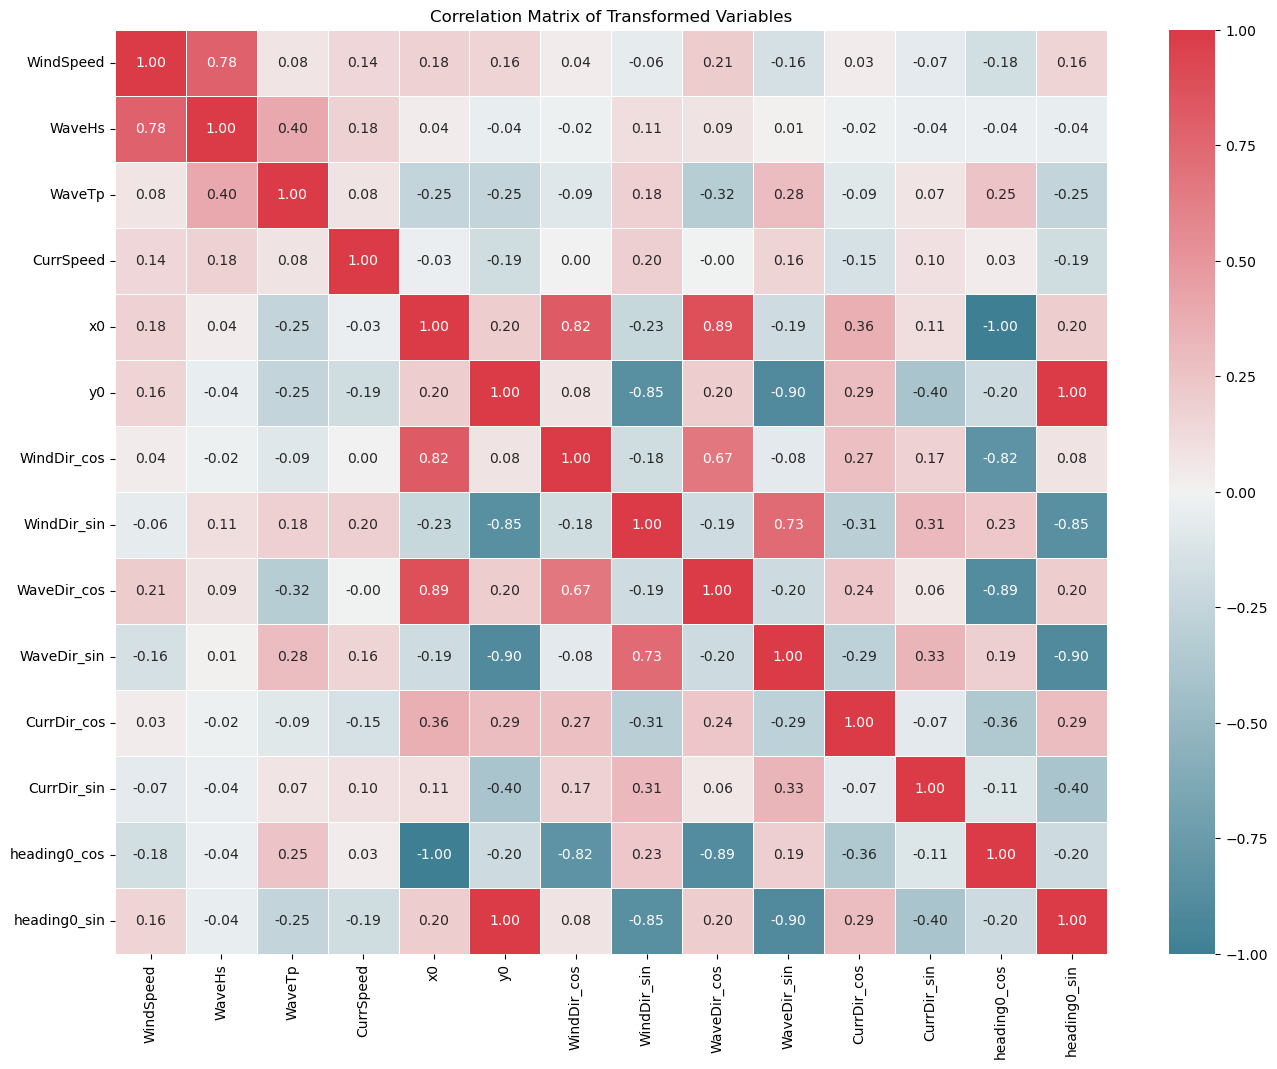

In [19]:
# Drop the original directional columns
data_transformed = df_input.drop(columns=["EnvTime","dist0","time_closest", "x_closest", "y_closest", "dist_closest", "DriftDirection_closest", "velocity_closest", "HitBool", "heading_closest_sin", "heading_closest_cos", 'WindDir', 'WaveDir', 'CurrDir', "heading0", "heading_closest"])

# Compute correlation matrix for transformed data
corr_matrix_transformed = data_transformed.corr()

# Visualize the new correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_transformed, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5)
plt.title("Correlation Matrix of Transformed Variables")
plt.savefig('corrmatrixtransf.png')
plt.show()

In [20]:
data = df_input.copy()

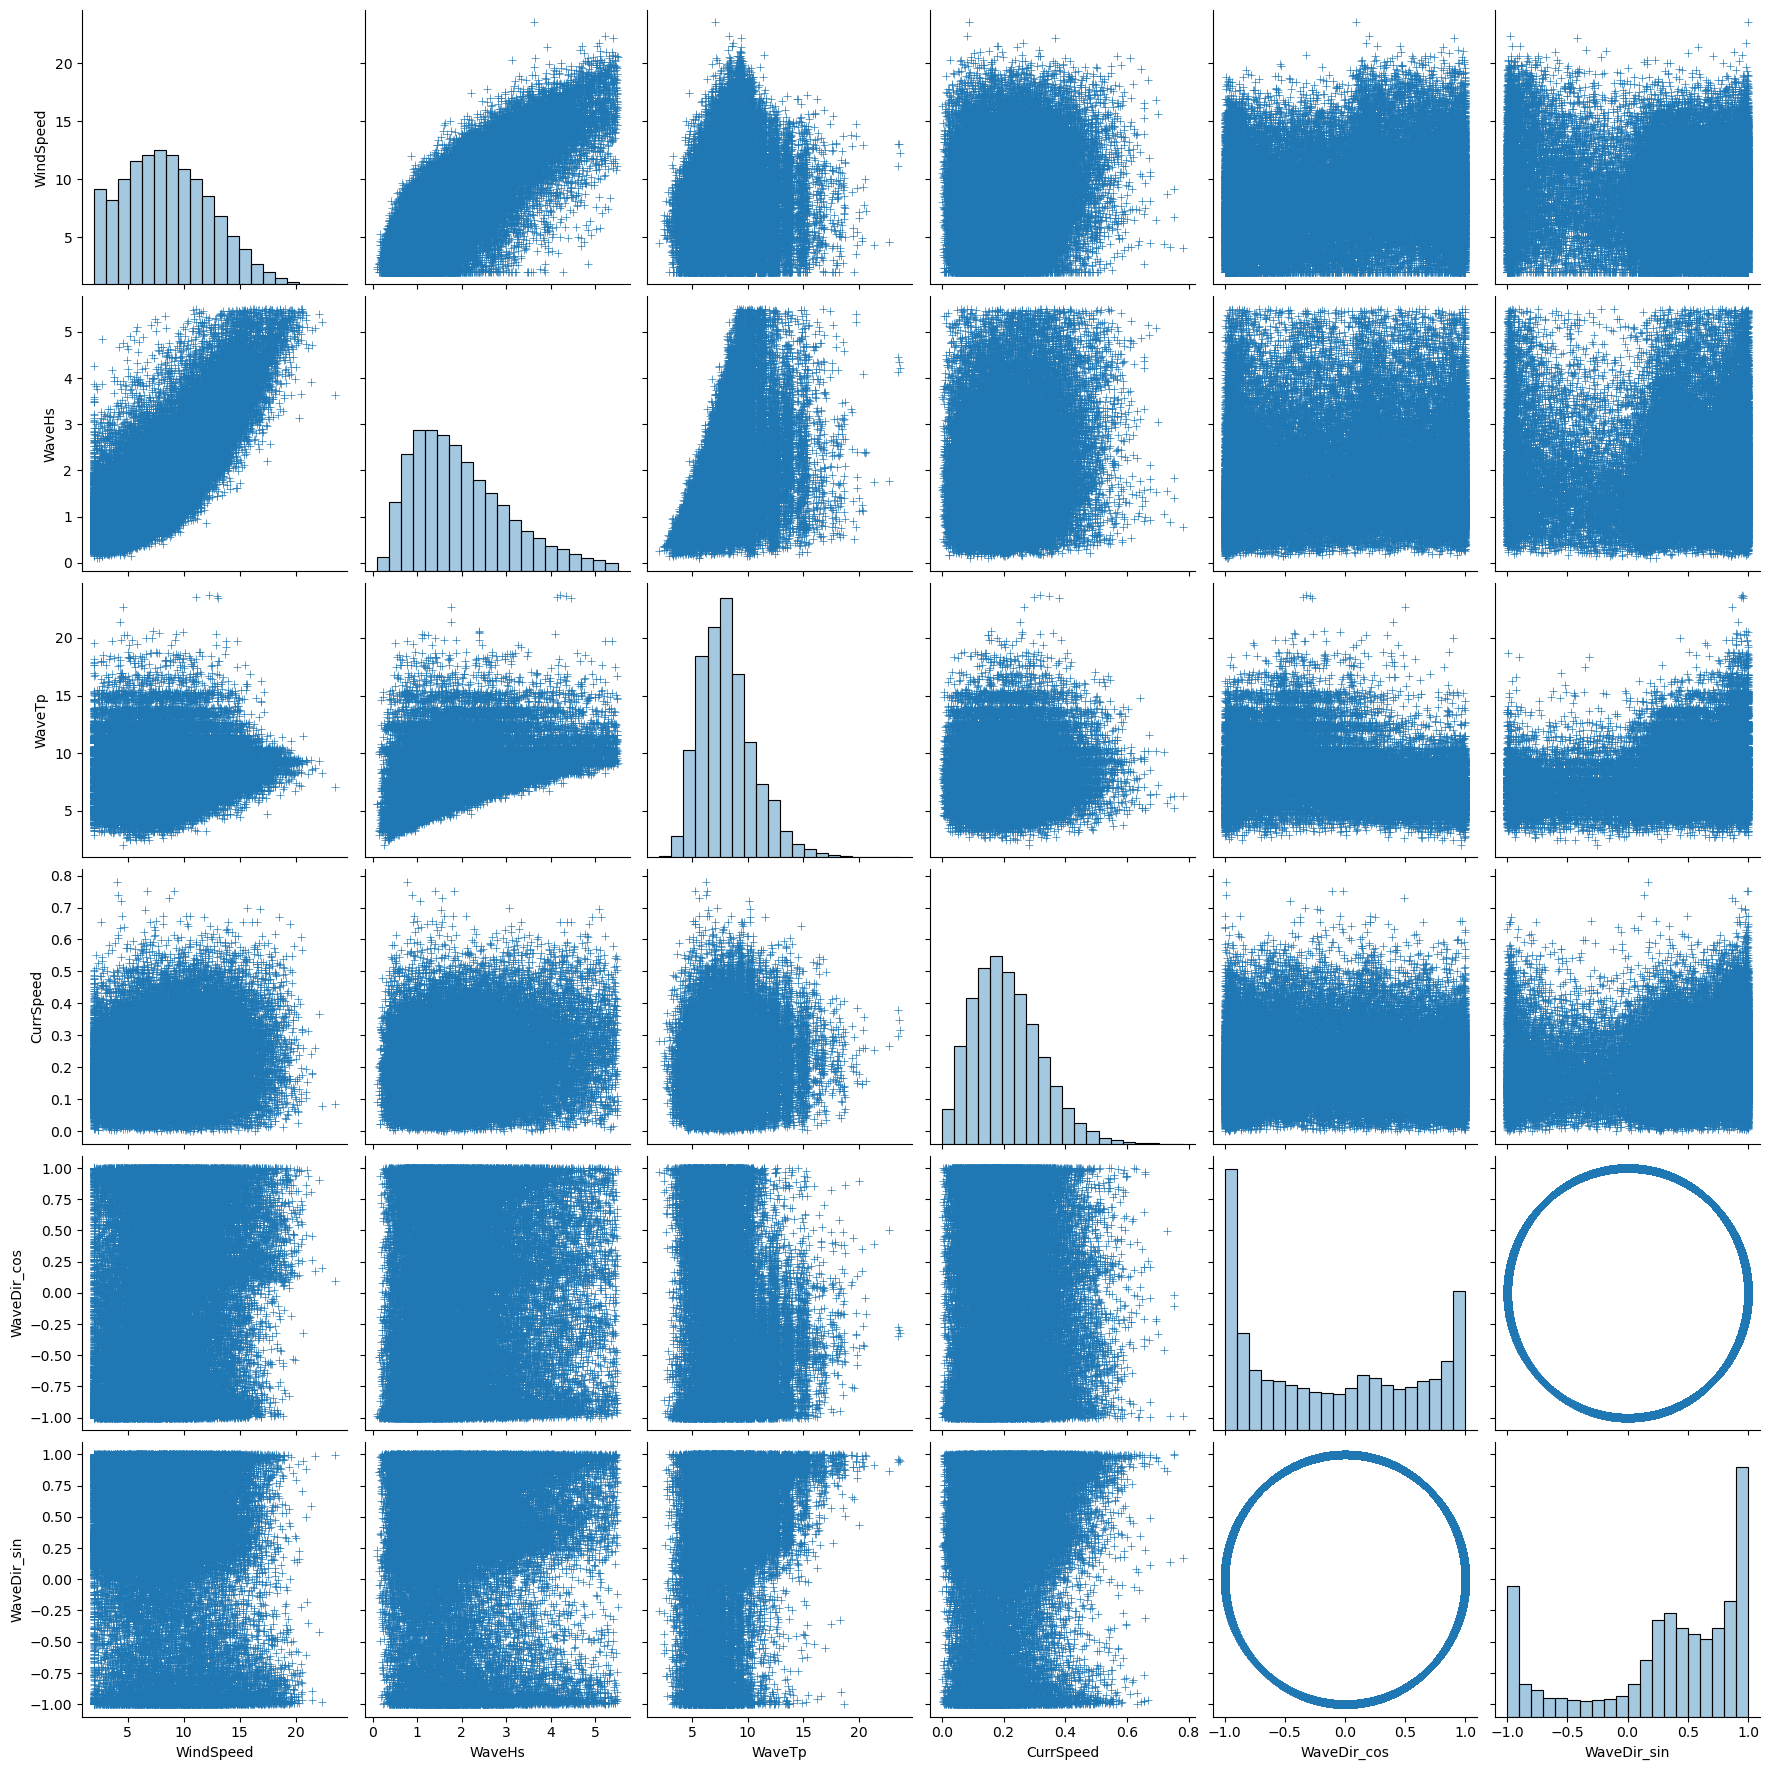

In [21]:
# Select key features for pair plot
key_features = ['WindSpeed', 'WaveHs', 'WaveTp', 'CurrSpeed', "WaveDir_cos", "WaveDir_sin"]

# Create pair plot with enhancements
sns.pairplot(
    data[key_features], 
    markers='+',
    diag_kws={'bins': 20, 'alpha': 0.4},
    height=3
)

plt.savefig('pairplot1.png')
plt.show()

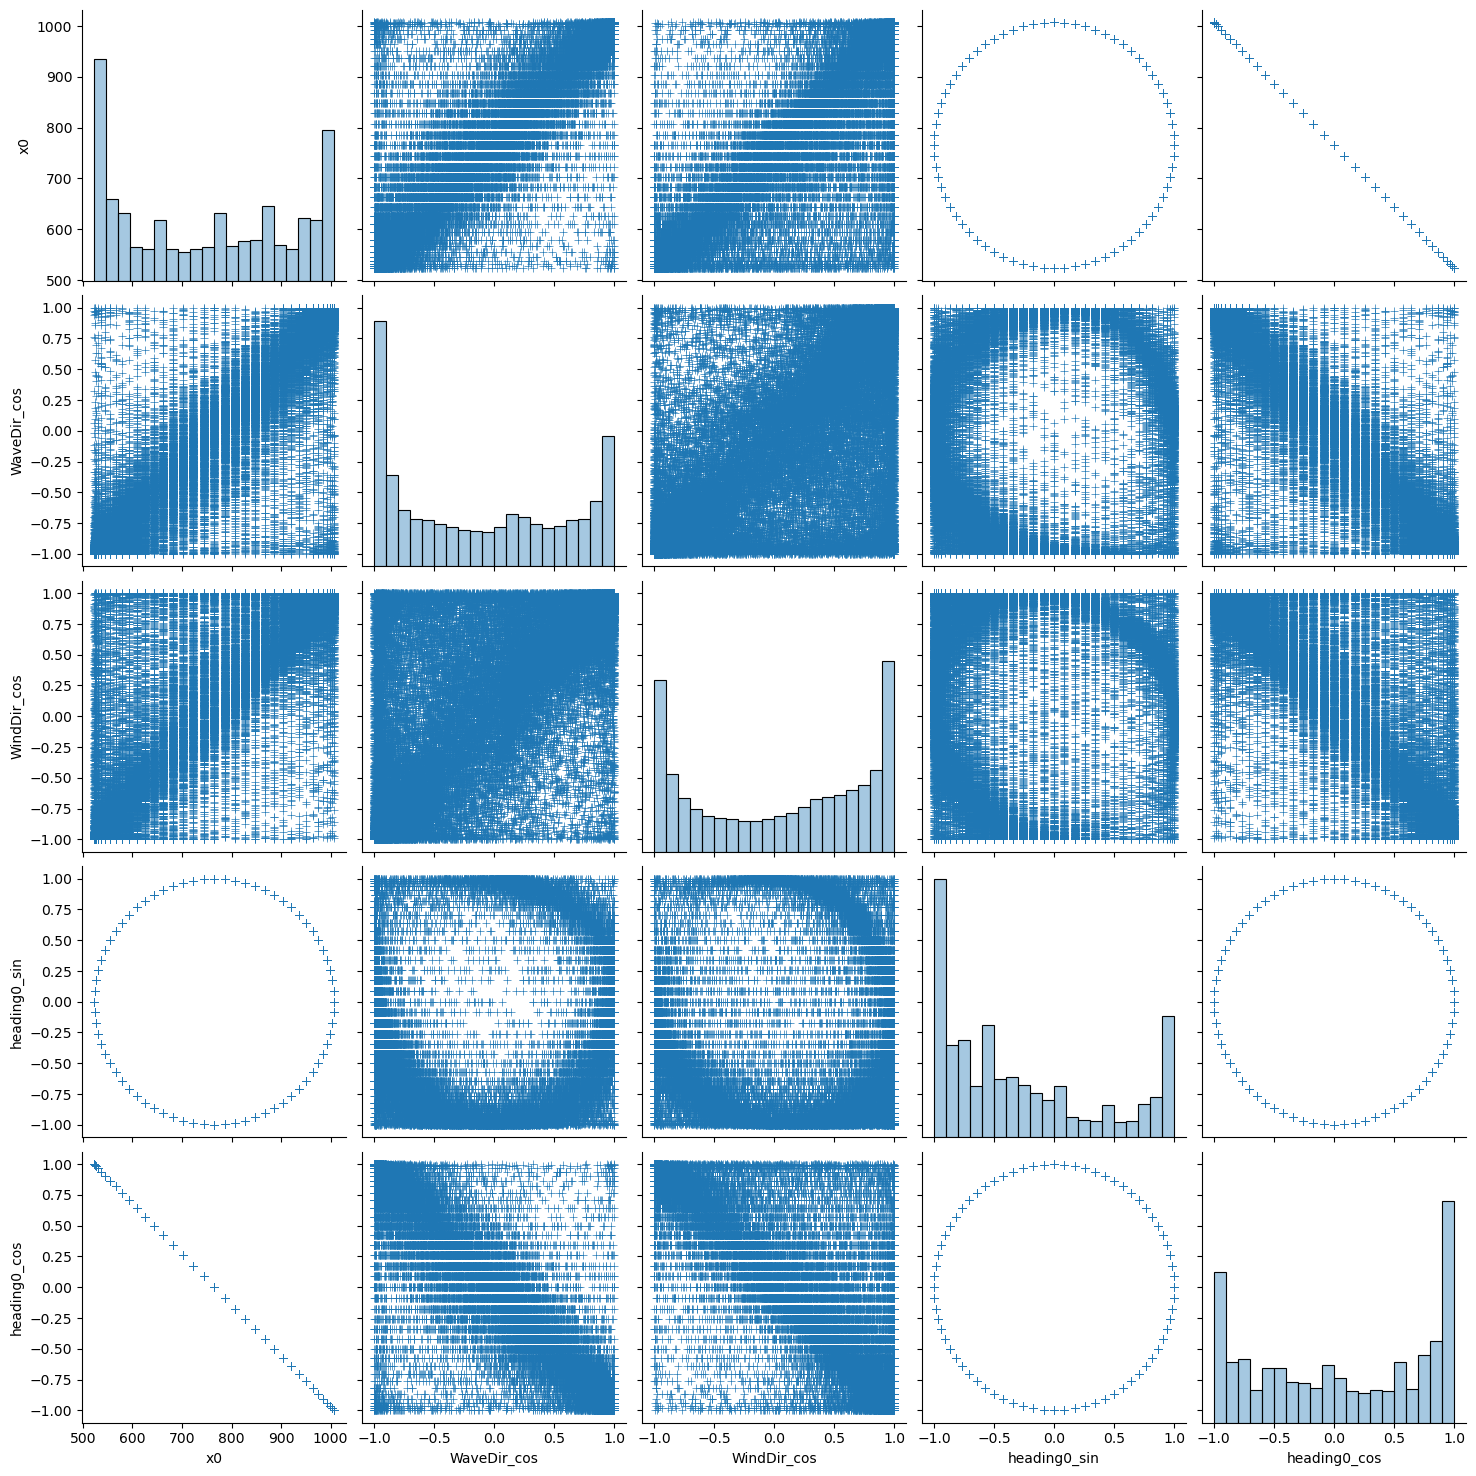

In [22]:
# Select key features for pair plot
key_features = ["x0", "WaveDir_cos", "WindDir_cos", "heading0_sin", "heading0_cos"]

# Create pair plot with enhancements
sns.pairplot(
    data[key_features], 
    markers='+',
    diag_kws={'bins': 20, 'alpha': 0.4},
    height=3
)

plt.savefig('pairplot2.png')
plt.show()

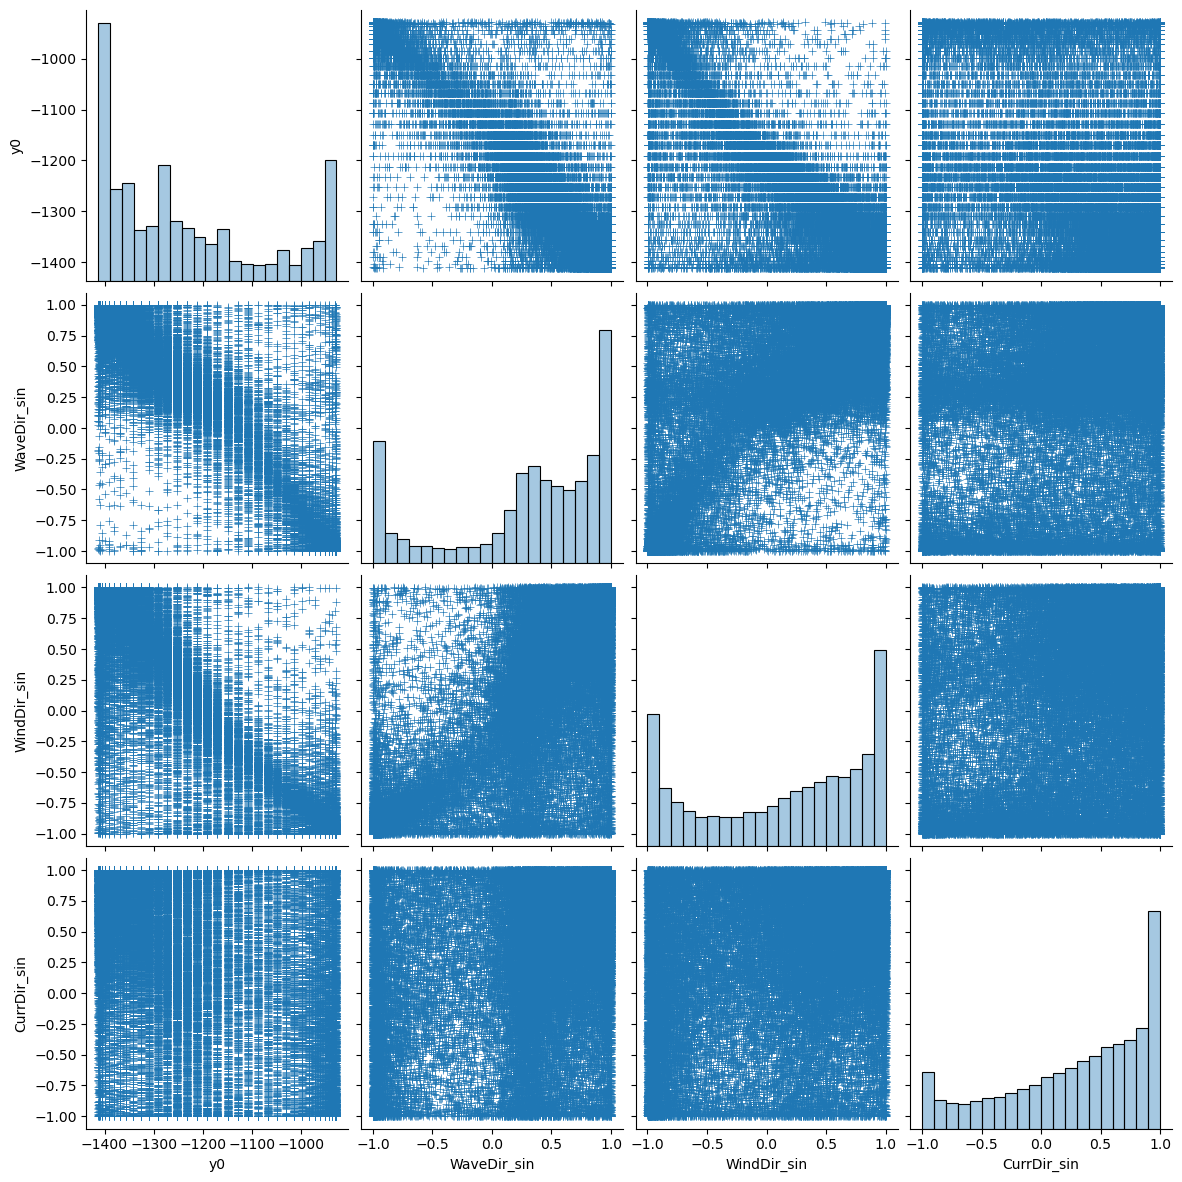

In [23]:
# Select key features for pair plot
key_features = ["y0", "WaveDir_sin", "WindDir_sin", "CurrDir_sin"]

# Create pair plot with enhancements
sns.pairplot(
    data[key_features], 
    markers='+',
    diag_kws={'bins': 20, 'alpha': 0.4},
    height=3
)

plt.savefig('pairplot3.png')
plt.show()

In [24]:
# Select key features for pair plot
key_features = ["WindDir_sin", "WindDir_cos", "WindDir", "WaveDir_sin", "WaveDir_cos", "WaveDir", "CurrDir_sin", "CurrDir_cos", "CurrDir", "WindSpeed", "WaveHs", "WaveTp", "CurrSpeed"]


In [25]:
data_transformed["heading0"] = df_input["heading0"]
data_transformed["WindDir"] = df_input["WindDir"]
data_transformed["WaveDir"] = df_input["WaveDir"]
data_transformed["CurrDir"] = df_input["CurrDir"]

data_transformed

WindSpeed  WaveHs  WaveTp  CurrSpeed       x0        y0  WindDir_cos  \
39087      5.365   1.654  12.373      0.104  765.030 -1412.680     0.802755   
30893      5.764   1.289   5.872      0.447  609.283  -984.767     0.322695   
45278     10.673   3.229   8.585      0.140  702.318 -1404.424    -0.325634   
16398      3.814   1.286  11.986      0.283  722.955 -1408.999    -0.038859   
13653      7.442   0.947   4.248      0.186  963.511 -1031.402     0.798383   
...          ...     ...     ...        ...      ...       ...          ...   
11284      6.590   1.128   5.773      0.155  984.628 -1067.980     0.893575   
44732     12.339   4.152  10.312      0.159  984.628 -1272.780     0.912599   
38158      2.000   0.346   4.889      0.201  537.342 -1087.509     0.484336   
860        5.038   2.166  12.593      0.187  545.432 -1272.780    -0.593419   
15795      8.555   1.310  10.895      0.337  682.159 -1398.068    -0.124589   

       WindDir_sin  WaveDir_cos  WaveDir_sin  CurrDir_cos  CurrDir_sin  \
39087    -0.596309    -0.349095     0.937087    -0.850499    -0.525976   
30893    -0.946503    -0.901516    -0.432747     0.532817     0.846230   
45278     0.945496    -0.229251     0.973367    -0.074787     0.997200   
16398     0.999245    -0.318480     0.947930    -0.070070     0.997542   
13653    -0.602150     0.904842    -0.425748    -0.789352     0.613941   
...            ...          ...          ...          ...          ...   
11284    -0.448914     0.911669    -0.410926    -0.980580     0.196117   
44732     0.408856     0.934751     0.355303     0.235600     0.971850   
38158    -0.874882     0.594767     0.803898    -0.976597    -0.215076   
860       0.804894    -0.971764     0.235956    -0.716387     0.697703   
15795     0.992208    -0.677261     0.735743    -0.474718     0.880138   

       heading0_cos  heading0_sin  heading0  WindDir  WaveDir  CurrDir  
39087 -1.836970e-16     -1.000000     270.0  323.394  110.432  211.734  
30893  6.427876e-01      0.766044      50.0  288.826  205.642   57.804  
45278  2.588190e-01     -0.965926     285.0  109.004  103.253   94.289  
16398  1.736482e-01     -0.984808     280.0   92.227  108.571   94.018  
13653 -8.191520e-01      0.573576     145.0  322.976  334.802  142.125  
...             ...           ...       ...      ...      ...      ...  
11284 -9.063078e-01      0.422618     155.0  333.326  335.737  168.690  
44732 -9.063078e-01     -0.422618     205.0   24.133   20.812   76.373  
38158  9.396926e-01      0.342020      20.0  298.969   53.504  192.420  
860    9.063078e-01     -0.422618     335.0  126.400  166.352  135.757  
15795  3.420201e-01     -0.939693     290.0   97.157  132.630  118.341  

[40000 rows x 18 columns]

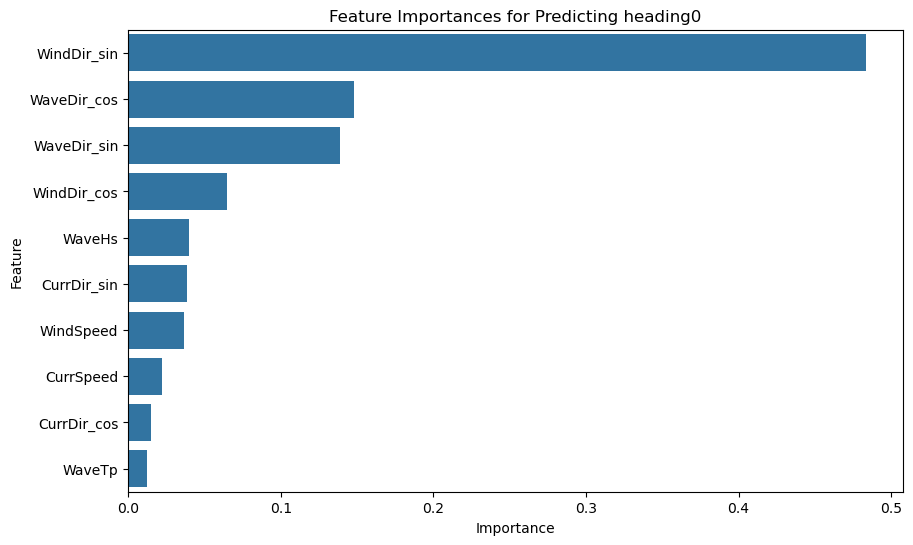

In [26]:
from sklearn.ensemble import RandomForestRegressor


features = data_transformed.drop(columns=["x0", "y0", "heading0_sin", "heading0_cos", "heading0", "WindDir", "WaveDir", "CurrDir"])  # Assuming heading0 is the target variable
target = data['heading0']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

importances = model.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Predicting heading0')
plt.show()

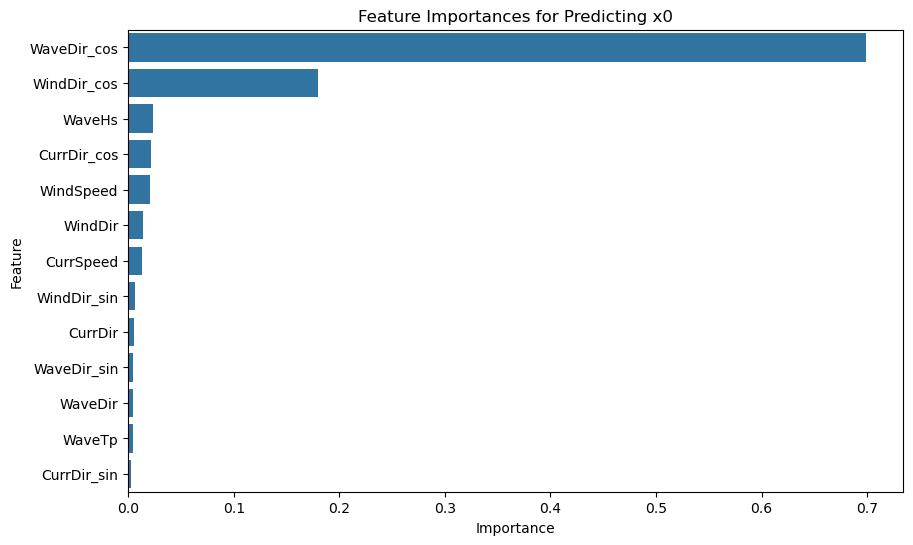

In [27]:
features = data_transformed.drop(columns=["x0", "y0", "heading0_sin", "heading0_cos", "heading0"])  # Assuming heading0 is the target variable
target = data['x0']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

importances = model.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Predicting x0')
plt.show()

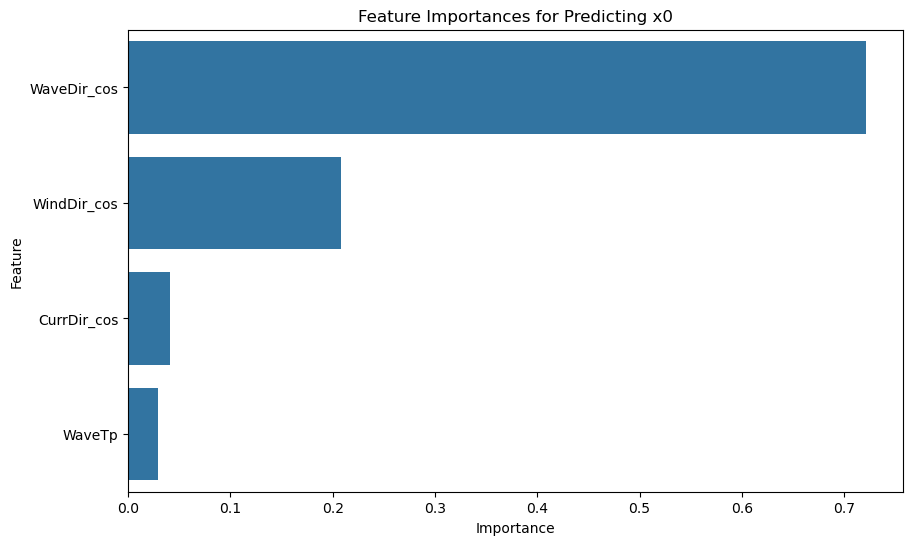

In [28]:
predictor_cols = [
    "WindDir_cos", "WaveTp", "WaveDir_cos", "CurrDir_cos"
]
features = data_transformed[predictor_cols]
target = data['x0']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

importances = model.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Predicting x0')
plt.show()

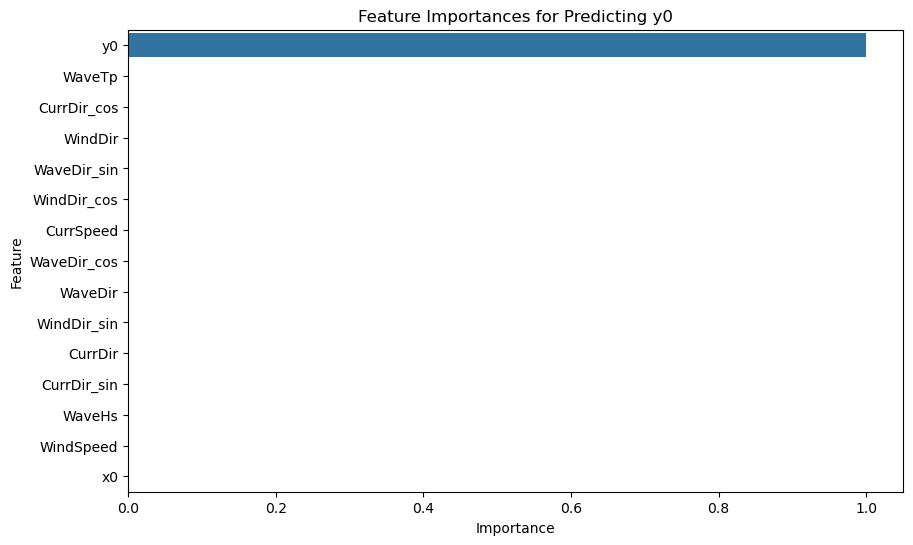

In [30]:
features = data_transformed.drop(columns=["heading0_sin", "heading0_cos", "heading0"])  # Assuming heading0 is the target variable
target = data['y0']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

importances = model.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Predicting y0')
plt.show()

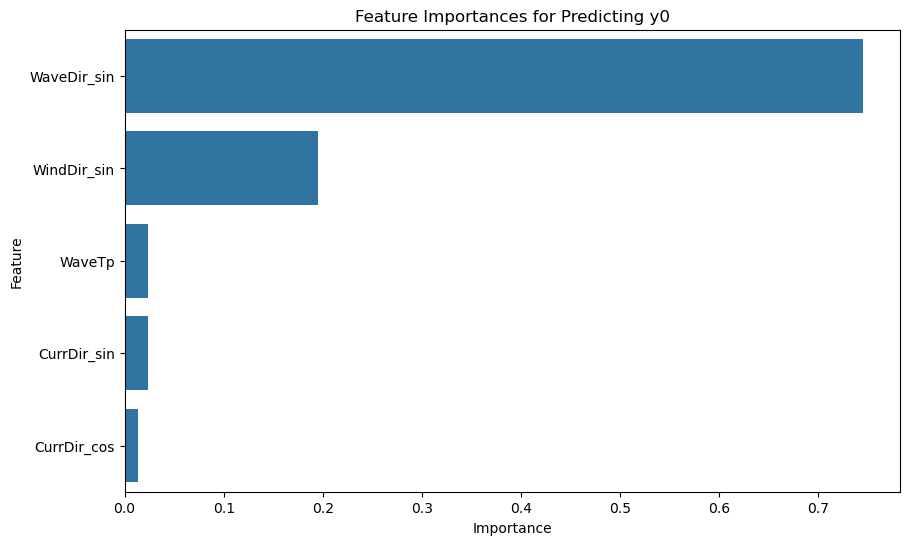

In [31]:
predictor_cols = [
    "WindDir_sin", "WaveTp", "WaveDir_sin", "CurrDir_cos", "CurrDir_sin"
]
features = data_transformed[predictor_cols]
target = data['y0']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

importances = model.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Predicting y0')
plt.show()

C:\Users\lords\anaconda3\envs\repsol_drift\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


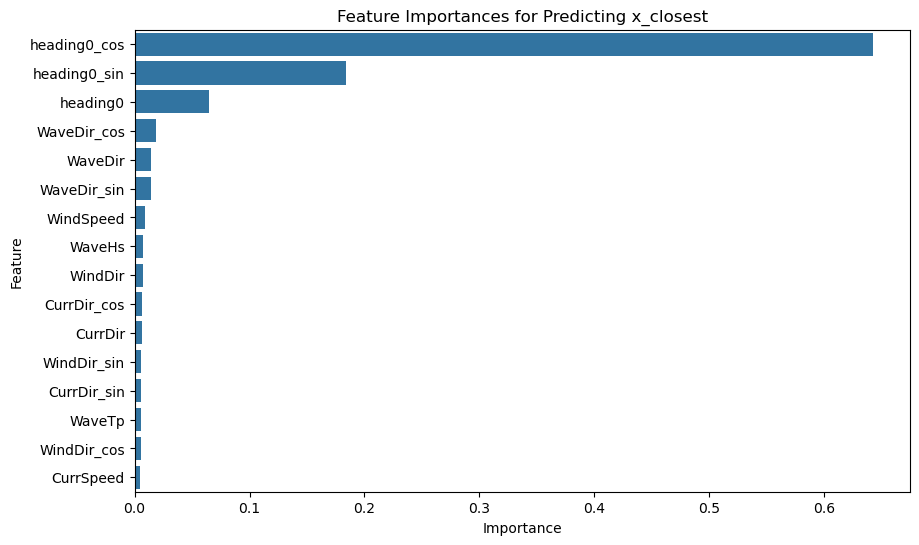

In [32]:
predictor_cols = [
    "WindSpeed", "WindDir", "WindDir_cos", "WindDir_sin", "WaveHs", "WaveTp", 
    "WaveDir", "WaveDir_cos", "WaveDir_sin", "CurrDir", "CurrDir_cos", "CurrDir_sin",
    "CurrSpeed" ,
    "heading0_sin",  "heading0_cos", "heading0"
]
target_cols = ["x_closest"]

features = data[predictor_cols]
target = data[target_cols]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

importances = model.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Predicting x_closest')
plt.show()

C:\Users\lords\anaconda3\envs\repsol_drift\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


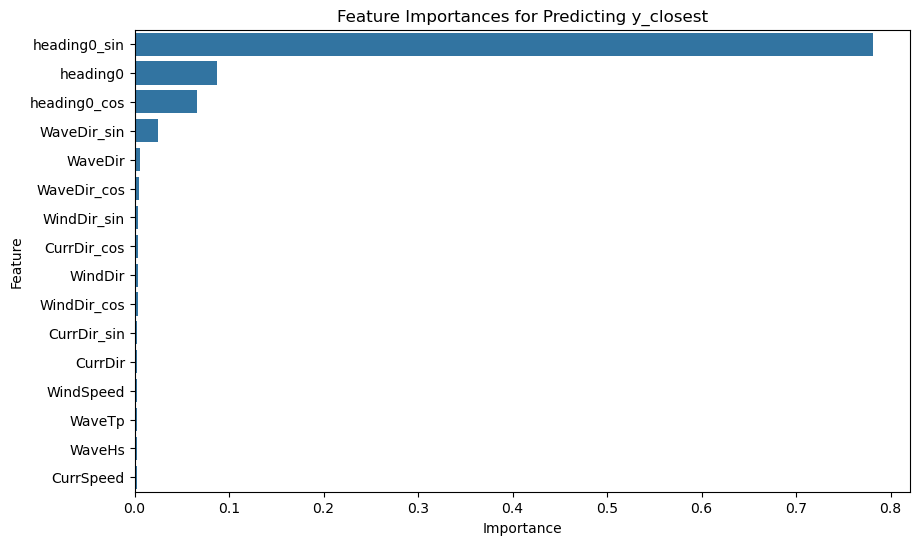

In [33]:
predictor_cols = [
    "WindSpeed", "WindDir", "WindDir_cos", "WindDir_sin", "WaveHs", "WaveTp", 
    "WaveDir", "WaveDir_cos", "WaveDir_sin", "CurrDir", "CurrDir_cos", "CurrDir_sin",
    "CurrSpeed" ,
    "heading0_sin",  "heading0_cos", "heading0"
]
target_cols = ["y_closest"]

features = data[predictor_cols]
target = data[target_cols]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

importances = model.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Predicting y_closest')
plt.show()

C:\Users\lords\anaconda3\envs\repsol_drift\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


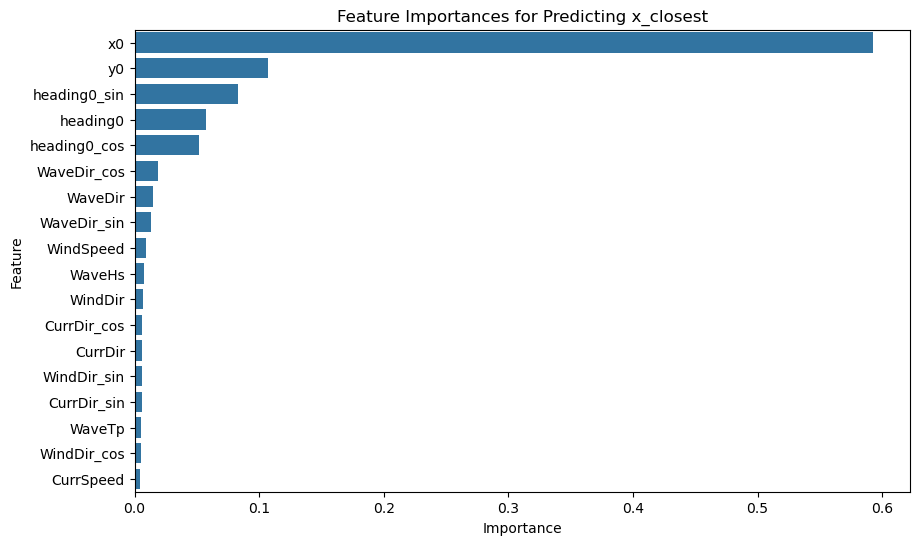

In [34]:
predictor_cols = [
    "WindSpeed", "WindDir", "WindDir_cos", "WindDir_sin", "WaveHs", "WaveTp", 
    "WaveDir", "WaveDir_cos", "WaveDir_sin", "CurrDir", "CurrDir_cos", "CurrDir_sin",
    "CurrSpeed" ,
    "heading0_sin",  "heading0_cos", "heading0", "x0", "y0"
]
target_cols = ["x_closest"]

features = data[predictor_cols]
target = data[target_cols]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

importances = model.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Predicting x_closest')
plt.show()

C:\Users\lords\anaconda3\envs\repsol_drift\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


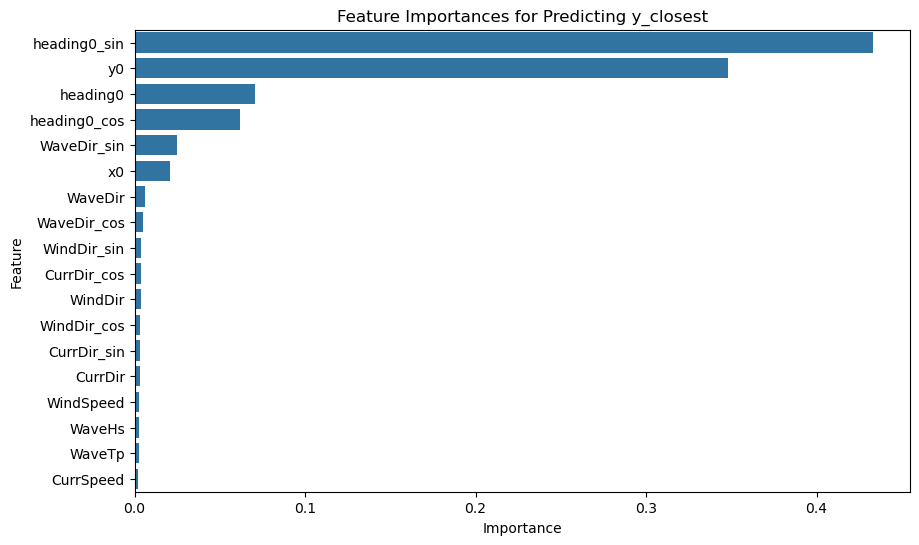

In [35]:
predictor_cols = [
    "WindSpeed", "WindDir", "WindDir_cos", "WindDir_sin", "WaveHs", "WaveTp", 
    "WaveDir", "WaveDir_cos", "WaveDir_sin", "CurrDir", "CurrDir_cos", "CurrDir_sin",
    "CurrSpeed" ,
    "heading0_sin",  "heading0_cos", "heading0", "x0", "y0"
]
target_cols = ["y_closest"]

features = data[predictor_cols]
target = data[target_cols]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

importances = model.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Predicting y_closest')
plt.show()

C:\Users\lords\anaconda3\envs\repsol_drift\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


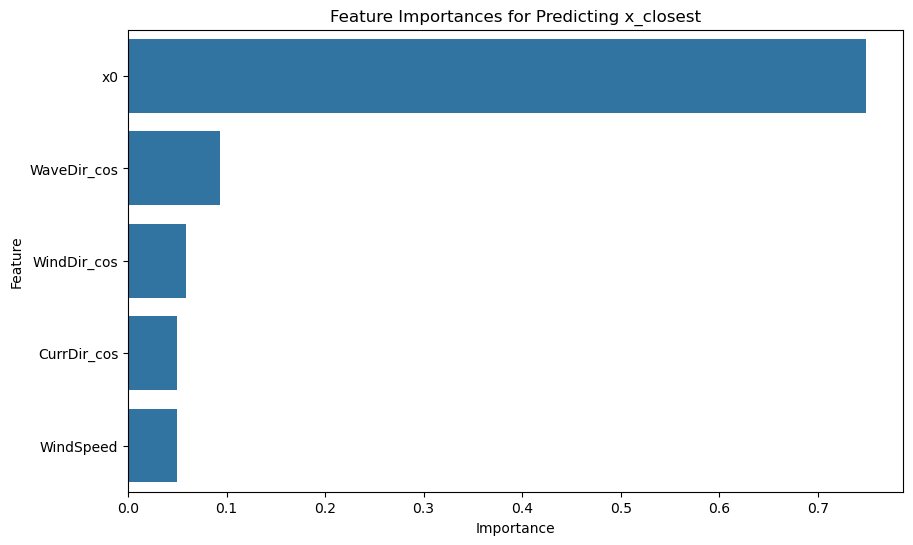

In [36]:
predictor_cols = [
    "WindSpeed", "WindDir_cos", "WaveDir_cos", "CurrDir_cos","x0"
]
target_cols = ["x_closest"]

features = data[predictor_cols]
target = data[target_cols]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

importances = model.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Predicting x_closest')
plt.show()

C:\Users\lords\anaconda3\envs\repsol_drift\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


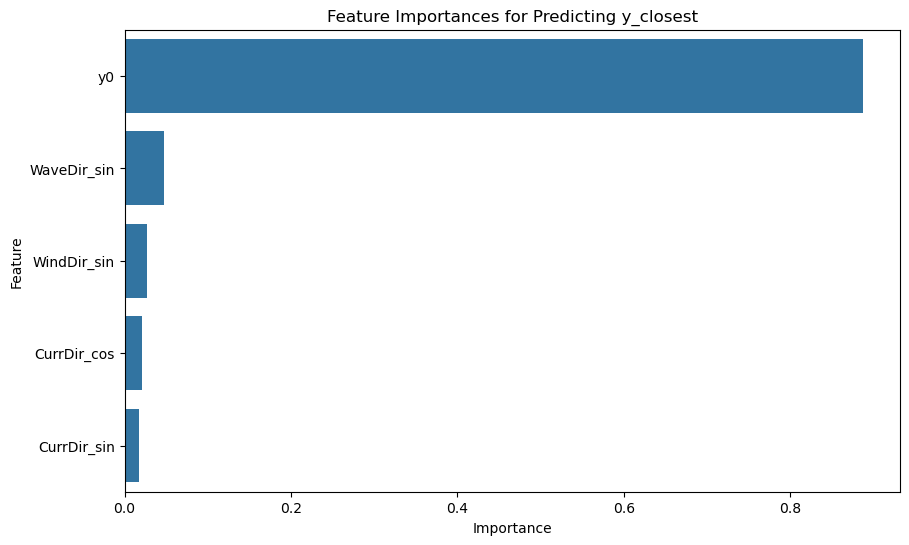

In [37]:
predictor_cols = [
    "CurrDir_sin", "WindDir_sin", "WaveDir_sin", "CurrDir_cos","y0"
]
target_cols = ["y_closest"]

features = data[predictor_cols]
target = data[target_cols]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

importances = model.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Predicting y_closest')
plt.show()

C:\Users\lords\anaconda3\envs\repsol_drift\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


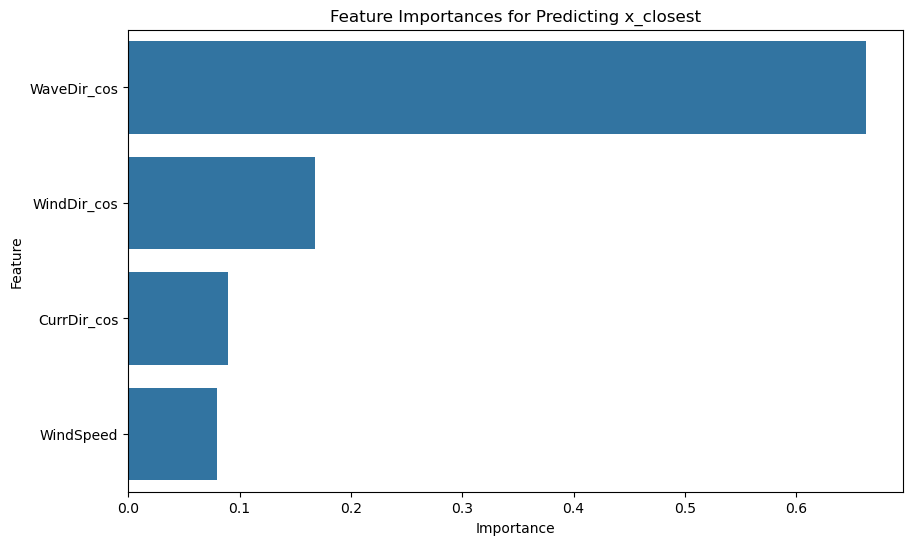

In [38]:
predictor_cols = [
    "WindSpeed", "WindDir_cos", "WaveDir_cos", "CurrDir_cos"
]
target_cols = ["x_closest"]

features = data[predictor_cols]
target = data[target_cols]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

importances = model.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Predicting x_closest')
plt.show()

C:\Users\lords\anaconda3\envs\repsol_drift\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


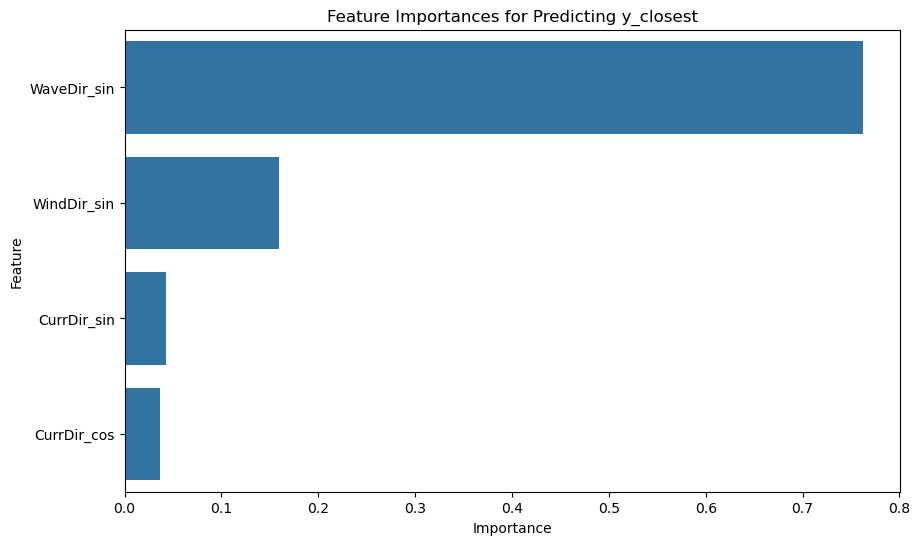

In [39]:
predictor_cols = [
    "CurrDir_sin", "WindDir_sin", "WaveDir_sin", "CurrDir_cos"
]
target_cols = ["y_closest"]

features = data[predictor_cols]
target = data[target_cols]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

importances = model.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Predicting y_closest')
plt.show()

### AHORA PASAMOS AL ENTRENAMIENTO DE MODELOS

### IMPORTAMOS LIBRERÍAS

In [40]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import lightgbm as lgb

### ALGUNOS AJUSTES INICIALES

### AHORA DEFINIMOS ALGUNAS FUNCIONES GENÉRICAS

In [41]:
def load_data(input_path, file_name):
    """
    Load data from a CSV file and perform initial preprocessing.
    """
    df = pd.read_csv(os.path.join(input_path, file_name), sep=",")
    #df = df.drop(["Unnamed: 0"], axis=1)
    df = df.drop(["caseID", "EnvID"], axis=1)
    df = df.sort_values(["EnvTime"])
    return df


def encode_angles(df, angular_cols):
    """
    Encode angular columns using sine and cosine transformations.
    """
    for col in angular_cols:
        print(f"Encoding angular variable ---> {col}")
        df[col + "_cos"] = np.cos(np.radians(df[col]))
        df[col + "_sin"] = np.sin(np.radians(df[col]))
    return df

def save_model(model_name, model, light_gbm=False):
    """
    Save the model to a file.
    """
    directory = os.path.join("drift_prediction_utils/Models", model_name + (".txt" if light_gbm else ".pkl"))
    if light_gbm:
        model.booster_.save_model(directory)
    else:
        joblib.dump(model, directory, compress=3)
    print(f"Model saved to {directory}")

def angular_difference(y_true, y_pred):
    """
    Calculate the angular difference between true and predicted angles.
    """
    diff = np.abs(y_true - y_pred)
    diff = np.where(diff > 180, 360 - diff, diff)
    return diff

### NECESITAMOS ALGUNAS LIBRERÍAS ADICIONALES PARA EL TRAINING

In [42]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, recall_score, precision_score, balanced_accuracy_score, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, classification_report
import joblib
import shap
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

C:\Users\lords\anaconda3\envs\repsol_drift\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Y DEFINIR ALGUNAS FUNCIONES MÁS PARA EL ENTRENAMIENTO Y EVALUACIÓN DE LOS MODELOS

In [43]:
def train_hgbr_model(X_train, y_train):
    """
    Train the heading prediction model using MultiOutputRegressor and HistGradientBoostingRegressor.
    """

    model = MultiOutputRegressor(HistGradientBoostingRegressor(random_state=42, l2_regularization = 0.1, learning_rate = 0.1, max_depth = None, max_iter = 1000, min_samples_leaf = 15))
    
    model.fit(X_train, y_train)
    return model

def evaluate_heading_model(model, X_train, y_train, heading0_train, df):
    """
    Evaluate the heading prediction model and plot the results.
    """
    y_pred = model.predict(X_train)

    # Compute metrics
    mae_sin = mean_absolute_error(y_train['heading0_sin'], y_pred[:, 1])
    mae_cos = mean_absolute_error(y_train['heading0_cos'], y_pred[:, 0])

    # Compute the angle using arctan2
    angle_radians = np.arctan2(y_pred[:, 1], y_pred[:, 0])
    angle_degrees = np.degrees(angle_radians)
    angle_degrees_predicted = (angle_degrees + 360) % 360

    df_plot = pd.DataFrame({"x": range(len(y_train)), "y_test": heading0_train, "y_predict": angle_degrees_predicted})

    # Print metrics
    print(f'Mean Absolute Error for sin_heading0: {mae_sin}')
    print(f'Mean Absolute Error for cos_heading0: {mae_cos}')

    diff = np.abs(df.loc[y_train.index].heading0 - angle_degrees_predicted)
    angular_diff = np.where(diff > 180, 360 - diff, diff)

    df_plot["diff"] = angular_diff
    mae_heading0 = np.mean(angular_diff)
    print(f'Mean Absolute Error para heading0: {mae_heading0}')

    # Plot predictions
    # fig = px.scatter(df_plot.sample(200), x="x", y=["y_test", "y_predict"], title='Predicted vs True Values for Heading0')
    # fig.show()
    # Create the scatter plot
    plt.figure(figsize=(10, 6))

    df_plot_sample = df_plot.sample(200)
    
    # Plot true values
    sns.scatterplot(x='x', y='y_test', data=df_plot_sample, color='blue', label='True Values', alpha=0.6)
    
    # Plot predicted values
    sns.scatterplot(x='x', y='y_predict', data=df_plot_sample, color='orange', label='Predicted Values', alpha=0.6)
    
    # Add trend line for true values
    sns.regplot(x='x', y='y_test', data=df_plot_sample, scatter=False, color='blue', line_kws={'label': 'Trend Line (True Values)'})
    
    # Add trend line for predicted values
    sns.regplot(x='x', y='y_predict', data=df_plot_sample, scatter=False, color='orange', line_kws={'label': 'Trend Line (Predicted Values)'})
    
    # Enhance the plot
    plt.title('Predicción vs Heading0 real', fontsize=15, fontweight='bold')
    plt.xlabel('Rango dataset training', fontsize=12)
    plt.ylabel('Valores de Heading', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

    return mae_heading0

def train_classification_model(X_train, y_train, params):
    """
    Train a LightGBM classification model.
    """
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train)], feature_name=X_train.columns.tolist())
    return model

def evaluate_classification_model(model, X_test, y_test):
    """
    Evaluate the classification model and plot the results.
    """
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    roc_auc = roc_auc_score(y_test, y_proba)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    print(f"ROC AUC: {roc_auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"Balanced Accuracy: {balanced_acc}")

    print(classification_report(y_test, y_pred, target_names=["No_Hit", "Hit"]))

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr)
    plt.title("ROC Curve")
    plt.show()

    lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(lr_recall, lr_precision, marker='.')
    plt.title("Precision-Recall Curve")
    plt.show()

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No_Hit", "Hit"])
    disp.plot()
    plt.show()

def train_rf_model(X_train, y_train):
    """
    Train the drift prediction model using MultiOutputRegressor and RandomForestRegressor.
    """
    rf = RandomForestRegressor(random_state=42, n_estimators=200, min_samples_split=2, min_samples_leaf=1)
    model = MultiOutputRegressor(rf)
    
    model.fit(X_train, y_train)
    return model

def evaluate_drift_model(model, X_train, y_train):
    """
    Evaluate the drift prediction model and plot the results.
    """
    y_pred = model.predict(X_train)


    mae_x = mean_absolute_error(y_train['x_closest'], y_pred[:, 0])
    mae_y = mean_absolute_error(y_train['y_closest'], y_pred[:, 1])
    d_predicted, d_real = np.linalg.norm(y_pred, axis=1), np.linalg.norm(y_train, axis=1)
    mae_d = mean_absolute_error(d_predicted, d_real)


    print(f'MAE para x: {mae_x}')
    print(f'MAE para y: {mae_y}')
    print(f'MAE para d: {mae_d}')

    df_drift_error = pd.DataFrame({"x_closest": y_train["x_closest"], "y_closest": y_train["y_closest"], "x_pred": y_pred[:, 0], "y_pred": y_pred[:, 1]})
    
    plt.scatter(range(len(y_pred[:100])), y_pred[:100, 0])
    plt.scatter(range(len(y_train[:100])), y_train["x_closest"][:100])
    plt.legend(["predict", "real"])
    plt.title("X results")
    plt.show()

    plt.scatter(range(len(y_pred[:100])), y_pred[:100, 1])
    plt.scatter(range(len(y_train[:100])), y_train["y_closest"][:100])
    plt.legend(["predict", "real"])
    plt.title("Y results")
    plt.show()

### AHORA VAMOS A PREPARAR LOS DATOS DE ENTRENAMIENTO

In [44]:
# Define predictor and target columns
predictor_columns = [
    'WindDir_cos','WindDir_sin', 'WaveDir_cos', 'WaveDir_sin', 'CurrDir_cos',  'CurrDir_sin', 
    'WindDir', 'WaveDir', 'CurrDir', 'WindSpeed', 'WaveHs', 'WaveTp', 'CurrSpeed',
]

target_cols = ['heading0', 'heading0_cos', 'heading0_sin']

X_train = df_input[predictor_columns]
y_train = df_input[target_cols]

y_test['heading0_cos'] = np.cos(np.radians(y_test['heading0']))
y_test['heading0_sin'] = np.sin(np.radians(y_test['heading0']))

In [45]:
heading0_train, heading0_test = y_train["heading0"], y_test["heading0"]

In [46]:
y_train.drop(["heading0"], inplace=True, axis=1)
y_test.drop(["heading0"], inplace=True, axis=1)

C:\Users\lords\AppData\Local\Temp\ipykernel_30564\3376164050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.drop(["heading0"], inplace=True, axis=1)


In [47]:
# Transforming directional data into sine and cosine components
X_test = encode_angles(df=X_test, angular_cols = ["WindDir", "WaveDir", "CurrDir"])

Encoding angular variable ---> WindDir
Encoding angular variable ---> WaveDir
Encoding angular variable ---> CurrDir


In [48]:
X_test = X_test[predictor_columns]

## ENTRENAMIENTO DE MODELOS

In [49]:
print("Features used by the model:", X_train.columns)
print("Features target for the model: ", y_train.columns)

Features used by the model: Index(['WindDir_cos', 'WindDir_sin', 'WaveDir_cos', 'WaveDir_sin',
       'CurrDir_cos', 'CurrDir_sin', 'WindDir', 'WaveDir', 'CurrDir',
       'WindSpeed', 'WaveHs', 'WaveTp', 'CurrSpeed'],
      dtype='object')
Features target for the model:  Index(['heading0_cos', 'heading0_sin'], dtype='object')


### MODEL 1: HEADING0

##### MODEL 1.0 - Heading0 (sin and cos) Regresión Lineal

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [51]:
def lr_training_heading(X_train, y_train, df):
    # Initialising Ridge() with above alpha
    lr = LinearRegression()
    
    #fitting model
    lr.fit(X_train,y_train)
    
    y_pred = lr.predict(X_train)
    
    # Compute metrics
    mae_sin = mean_absolute_error(y_train['heading0_sin'], y_pred[:, 1])
    mae_cos = mean_absolute_error(y_train['heading0_cos'], y_pred[:, 0])
    
    # Compute the angle using arctan2
    angle_radians = np.arctan2(y_pred[:, 1], y_pred[:, 0])
    angle_degrees = np.degrees(angle_radians)
    angle_degrees_predicted = (angle_degrees + 360) % 360
    
    
    # Print metrics
    print(f'Mean Absolute Error Linear Regression for sin_heading0: {mae_sin}')
    print(f'Mean Absolute Error Linear Regression for cos_heading0: {mae_cos}')
    
    diff = np.abs(df_raw.loc[y_train.index].heading0 - angle_degrees_predicted)
    angular_diff = np.where(diff > 180, 360 - diff, diff)
    
    mae_heading0 = np.mean(angular_diff)
    print(f'Mean Absolute Error Linear Regression para heading0: {mae_heading0}')

    return lr

In [52]:
lr_simple = lr_training_heading(X_train, y_train, df_raw)

Mean Absolute Error Linear Regression for sin_heading0: 0.11400530252358144
Mean Absolute Error Linear Regression for cos_heading0: 0.13049842072527082
Mean Absolute Error Linear Regression para heading0: 9.635805451020234


In [53]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

#initialising Ridge() function
ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet()
lr = LinearRegression()
# defining cross validation folds as 5
folds = 5

# Models list
modelos = [Ridge(),  Lasso(), ElasticNet()]

In [54]:
alpha_list = []
for model in modelos:
    
    # Defining GridSearchCV
    grid_cv_model = GridSearchCV(estimator=model,
                           param_grid=params,
                           scoring='neg_mean_absolute_error',
                           cv=folds,
                           return_train_score=True,
                           verbose=1)
    
    # fiting GridSearchCV() with X_train and y_train
    grid_cv_model.fit(X_train,y_train)
    alpha_param = grid_cv_model.best_params_
    alpha = alpha_param["alpha"]

    alpha_list.append(alpha)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [55]:
alpha_list

[50, 0.001, 0.001]

In [56]:
def linear_regression_training(model, alpha, folds, X_train, y_train, df): #añadir heading0_train para plotear

    # Initialising Ridge() with above alpha
    modelo =model(alpha=alpha)
    
    #fitting model
    modelo.fit(X_train,y_train)

    y_pred = modelo.predict(X_train)

    # Compute metrics
    mae_sin = mean_absolute_error(y_train['heading0_sin'], y_pred[:, 1])
    mae_cos = mean_absolute_error(y_train['heading0_cos'], y_pred[:, 0])

    # Compute the angle using arctan2
    angle_radians = np.arctan2(y_pred[:, 1], y_pred[:, 0])
    angle_degrees = np.degrees(angle_radians)
    angle_degrees_predicted = (angle_degrees + 360) % 360

    #df_plot = pd.DataFrame({"x": range(len(y_train)), "y_test": heading0_train, "y_predict": angle_degrees_predicted})

    # Print metrics
    print(f'Mean Absolute Error {model} for sin_heading0: {mae_sin}')
    print(f'Mean Absolute Error {model} for cos_heading0: {mae_cos}')

    diff = np.abs(df.loc[y_train.index].heading0 - angle_degrees_predicted)
    angular_diff = np.where(diff > 180, 360 - diff, diff)

    #df_plot["diff"] = angular_diff
    mae_heading0 = np.mean(angular_diff)
    print(f'Mean Absolute Error {model} para heading0: {mae_heading0}')

    return modelo

print("training done")

training done


In [57]:
ridge_model = linear_regression_training(Ridge, 50, folds, X_train, y_train, df_raw)

Mean Absolute Error <class 'sklearn.linear_model._ridge.Ridge'> for sin_heading0: 0.11397247164298883
Mean Absolute Error <class 'sklearn.linear_model._ridge.Ridge'> for cos_heading0: 0.13046076731338452
Mean Absolute Error <class 'sklearn.linear_model._ridge.Ridge'> para heading0: 9.638118073705293


In [58]:
lasso_model = linear_regression_training(Lasso, 0.001, folds, X_train, y_train, df_raw)

Mean Absolute Error <class 'sklearn.linear_model._coordinate_descent.Lasso'> for sin_heading0: 0.11392393982365442
Mean Absolute Error <class 'sklearn.linear_model._coordinate_descent.Lasso'> for cos_heading0: 0.13051315996910948
Mean Absolute Error <class 'sklearn.linear_model._coordinate_descent.Lasso'> para heading0: 9.695961947424946


In [59]:
ElastcNet_model = linear_regression_training(ElasticNet, 0.001, folds, X_train, y_train, df_raw)

Mean Absolute Error <class 'sklearn.linear_model._coordinate_descent.ElasticNet'> for sin_heading0: 0.11388818762511203
Mean Absolute Error <class 'sklearn.linear_model._coordinate_descent.ElasticNet'> for cos_heading0: 0.1303752155237274
Mean Absolute Error <class 'sklearn.linear_model._coordinate_descent.ElasticNet'> para heading0: 9.663132830837371


#### vamos a probar si entrenando solo para el x0 e y0 con las variables seleccionadas del estudio previo, mejor la precisión

In [60]:
params_x0 = ["WaveDir_cos", "WindDir_cos", "CurrDir_cos", "WaveTp"]
X_train_x0 = X_train[params_x0]
X_train_x0

WaveDir_cos  WindDir_cos  CurrDir_cos  WaveTp
39087    -0.349095     0.802755    -0.850499  12.373
30893    -0.901516     0.322695     0.532817   5.872
45278    -0.229251    -0.325634    -0.074787   8.585
16398    -0.318480    -0.038859    -0.070070  11.986
13653     0.904842     0.798383    -0.789352   4.248
...            ...          ...          ...     ...
11284     0.911669     0.893575    -0.980580   5.773
44732     0.934751     0.912599     0.235600  10.312
38158     0.594767     0.484336    -0.976597   4.889
860      -0.971764    -0.593419    -0.716387  12.593
15795    -0.677261    -0.124589    -0.474718  10.895

[40000 rows x 4 columns]

In [61]:
X_train

WindDir_cos  WindDir_sin  WaveDir_cos  WaveDir_sin  CurrDir_cos  \
39087     0.802755    -0.596309    -0.349095     0.937087    -0.850499   
30893     0.322695    -0.946503    -0.901516    -0.432747     0.532817   
45278    -0.325634     0.945496    -0.229251     0.973367    -0.074787   
16398    -0.038859     0.999245    -0.318480     0.947930    -0.070070   
13653     0.798383    -0.602150     0.904842    -0.425748    -0.789352   
...            ...          ...          ...          ...          ...   
11284     0.893575    -0.448914     0.911669    -0.410926    -0.980580   
44732     0.912599     0.408856     0.934751     0.355303     0.235600   
38158     0.484336    -0.874882     0.594767     0.803898    -0.976597   
860      -0.593419     0.804894    -0.971764     0.235956    -0.716387   
15795    -0.124589     0.992208    -0.677261     0.735743    -0.474718   

       CurrDir_sin  WindDir  WaveDir  CurrDir  WindSpeed  WaveHs  WaveTp  \
39087    -0.525976  323.394  110.432  211.734      5.365   1.654  12.373   
30893     0.846230  288.826  205.642   57.804      5.764   1.289   5.872   
45278     0.997200  109.004  103.253   94.289     10.673   3.229   8.585   
16398     0.997542   92.227  108.571   94.018      3.814   1.286  11.986   
13653     0.613941  322.976  334.802  142.125      7.442   0.947   4.248   
...            ...      ...      ...      ...        ...     ...     ...   
11284     0.196117  333.326  335.737  168.690      6.590   1.128   5.773   
44732     0.971850   24.133   20.812   76.373     12.339   4.152  10.312   
38158    -0.215076  298.969   53.504  192.420      2.000   0.346   4.889   
860       0.697703  126.400  166.352  135.757      5.038   2.166  12.593   
15795     0.880138   97.157  132.630  118.341      8.555   1.310  10.895   

       CurrSpeed  
39087      0.104  
30893      0.447  
45278      0.140  
16398      0.283  
13653      0.186  
...          ...  
11284      0.155  
44732      0.159  
38158      0.201  
860        0.187  
15795      0.337  

[40000 rows x 13 columns]

In [62]:
y_train_x0 = y_train.copy()
y_train_x0["x0"] = df_input["x0"]
y_train_x0.drop(["heading0_sin"], inplace=True, axis=1)
y_train_x0.drop(["heading0_cos"], inplace=True, axis=1)
y_train_x0

x0
39087  765.030
30893  609.283
45278  702.318
16398  722.955
13653  963.511
...        ...
11284  984.628
44732  984.628
38158  537.342
860    545.432
15795  682.159

[40000 rows x 1 columns]

In [63]:
alpha_list = []
for model in modelos:
    
    # Defining GridSearchCV
    grid_cv_model = GridSearchCV(estimator=model,
                           param_grid=params,
                           scoring='neg_mean_absolute_error',
                           cv=folds,
                           return_train_score=True,
                           verbose=1)
    
    # fiting GridSearchCV() with X_train and y_train
    grid_cv_model.fit(X_train_x0,y_train_x0)
    alpha_param = grid_cv_model.best_params_
    alpha = alpha_param["alpha"]

    alpha_list.append(alpha)
alpha_list

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits


[500, 3.0, 0.01]

In [64]:
def linear_regression_training(model, alpha, folds, X_train, y_train, df, column): #añadir heading0_train para plotear

    # Initialising Ridge() with above alpha
    modelo =model(alpha=alpha)
    
    #fitting model
    modelo.fit(X_train,y_train)

    y_pred = modelo.predict(X_train)

    # Compute metrics
    mae = mean_absolute_error(y_train[column], y_pred)

    # Print metrics
    print(f'Mean Absolute Error {model} for {column}: {mae}')

    return modelo


In [65]:
def lr_training(X_train, y_train, df, column):
    # Initialising Ridge() with above alpha
    lr = LinearRegression()
    
    #fitting model
    lr.fit(X_train,y_train)
    
    y_pred = lr.predict(X_train)
    
    # Compute metrics
    mae = mean_absolute_error(y_train[column], y_pred)

    
    
    # Print metrics
    print(f'Mean Absolute Error Linear Regression for {column}: {mae}')

    return lr

In [66]:
linear_regression_training(Ridge, 500, folds, X_train_x0, y_train_x0, df_raw, "x0")

Mean Absolute Error <class 'sklearn.linear_model._ridge.Ridge'> for x0: 32.23671751269502


Ridge(alpha=500)

In [67]:
linear_regression_training(Lasso, 3.0, folds, X_train_x0, y_train_x0, df_raw, "x0")

Mean Absolute Error <class 'sklearn.linear_model._coordinate_descent.Lasso'> for x0: 31.523115237435878


Lasso(alpha=3.0)

In [68]:
linear_regression_training(ElasticNet, 0.01, folds, X_train_x0, y_train_x0, df_raw, "x0")

Mean Absolute Error <class 'sklearn.linear_model._coordinate_descent.ElasticNet'> for x0: 32.251154254363044


ElasticNet(alpha=0.01)

In [69]:
lr_training(X_train_x0, y_train_x0, df_raw, "x0")

Mean Absolute Error Linear Regression for x0: 32.2959264800706


LinearRegression()

In [70]:
params_y0 = ["WaveDir_sin", "WindDir_sin", "CurrDir_cos", "WaveTp", "CurrDir_sin"]
X_train_y0 = X_train[params_y0]
y_train_y0 = y_train.copy()
y_train_y0["y0"] = df_input["y0"]
y_train_y0.drop(["heading0_sin"], inplace=True, axis=1)
y_train_y0.drop(["heading0_cos"], inplace=True, axis=1)

In [71]:
linear_regression_training(Ridge, 500, folds, X_train_y0, y_train_y0, df_raw, "y0")

Mean Absolute Error <class 'sklearn.linear_model._ridge.Ridge'> for y0: 28.580969581110367


Ridge(alpha=500)

In [72]:
linear_regression_training(Lasso, 3.0, folds, X_train_y0, y_train_y0, df_raw, "y0")

Mean Absolute Error <class 'sklearn.linear_model._coordinate_descent.Lasso'> for y0: 28.1495364540815


Lasso(alpha=3.0)

In [73]:
linear_regression_training(ElasticNet, 0.01, folds,X_train_y0, y_train_y0, df_raw, "y0")

Mean Absolute Error <class 'sklearn.linear_model._coordinate_descent.ElasticNet'> for y0: 28.530228800481364


ElasticNet(alpha=0.01)

In [74]:
lr_training(X_train_y0, y_train_y0, df_raw, "y0")

Mean Absolute Error Linear Regression for y0: 28.549556377833984


LinearRegression()

In [75]:
y_train_y0["y0"].min()

-1412.68

In [76]:
y_train_y0["y0"].max()

-928.08

In [77]:
y_train_x0["x0"].min()

522.73

In [78]:
y_train_x0["x0"].max()

1007.33

In [79]:
# PARA CALCULAR LA DISTANCIA ENTRE LOS PUNTOS, NO SOLO ENTRE SUS COORDENADAS
modelo_x0 = Lasso(3.0)

modelo_x0.fit(X_train_x0,y_train_x0)

y_pred_x0 = modelo_x0.predict(X_train_x0)

real_x0 = list(y_train_x0["x0"])


modelo_y0 = Lasso(3.0)

modelo_y0.fit(X_train_y0,y_train_y0)

y_pred_y0 = modelo_y0.predict(X_train_y0)

real_y0 = list(y_train_y0["y0"])

In [80]:
dist = np.sqrt(np.square(y_pred_x0 - real_x0) + np.square(y_pred_y0 - real_y0))

print(f'Mean Absolute Error for dist real vs pred: {dist.mean()}')

Mean Absolute Error for dist real vs pred: 46.84543387993464


In [81]:
# Compute the angle using arctan2
pred_radians = np.arctan2(y_pred_y0,y_pred_x0)
pred_degrees = np.degrees(pred_radians)
heading_degrees_predicted = (pred_degrees + 360) % 360

real_radians = np.arctan2(real_y0,real_x0)
real_degrees = np.degrees(real_radians)
heading_degrees_real = (real_degrees + 360) % 360

In [82]:
diff = np.abs(heading_degrees_real - heading_degrees_predicted)
angular_diff = np.where(diff > 180, 360 - diff, diff)

#df_plot["diff"] = angular_diff
mae_heading0 = np.mean(angular_diff)

#mae_heading0 = mean_absolute_error(heading_degrees_real, heading_degrees_predicted)
print(f'Mean Absolute Error Lasso para heading0: {mae_heading0}')

Mean Absolute Error Lasso para heading0: 1.2683841726444804


In [83]:
# PARA EVALUAR CON TEST

y_pred_x0 = modelo_x0.predict(X_test[params_x0])

real_x0 = list(df_raw.loc[y_test.index].x0)


y_pred_y0 = modelo_y0.predict(X_test[params_y0])

real_y0 = list(df_raw.loc[y_test.index].y0)

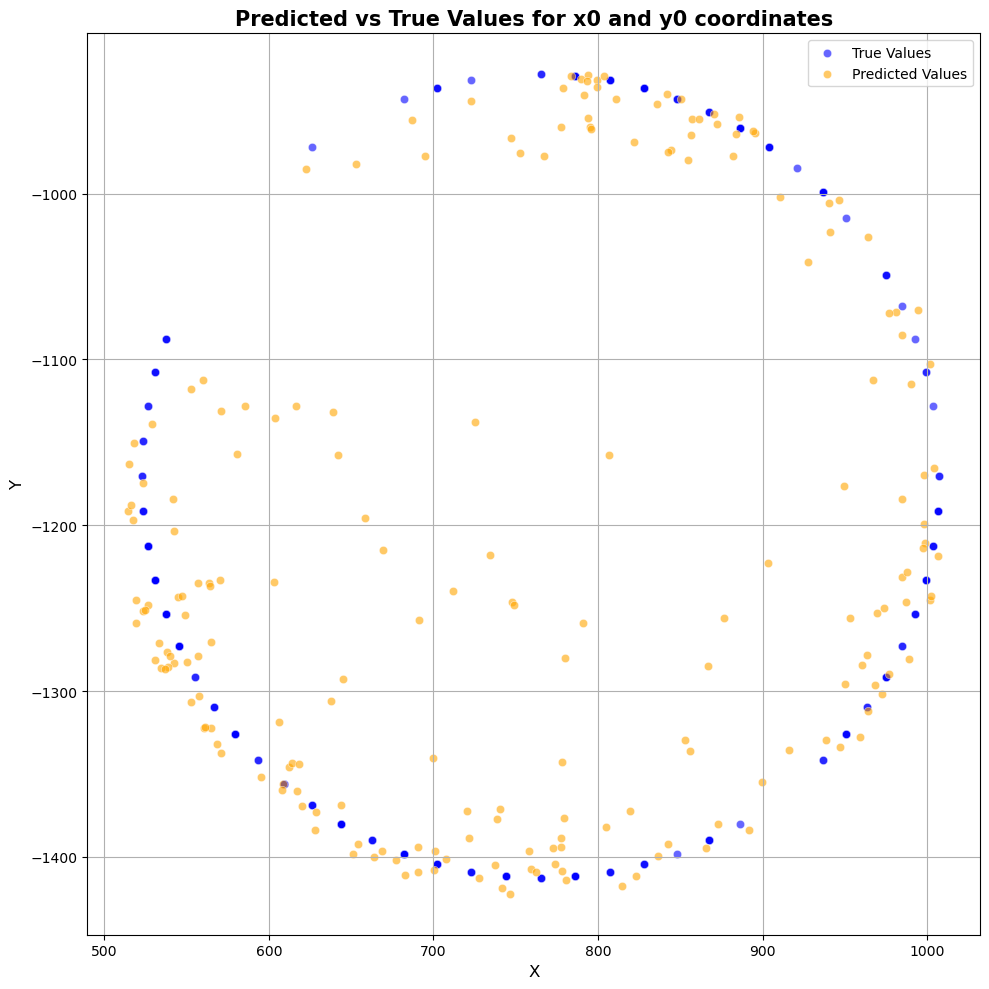

In [84]:
df_plot = pd.DataFrame({"x0_real": real_x0, "y0_real": real_y0, "x0_pred": y_pred_x0, "y0_pred": y_pred_y0})

plt.figure(figsize=(10, 10))

plot_sample = df_plot.sample(200)

# Plot true values
sns.scatterplot(x='x0_real', y='y0_real', data=plot_sample, color='blue', label='True Values', alpha=0.6)

# Plot predicted values
sns.scatterplot(x='x0_pred', y='y0_pred', data=plot_sample, color='orange', label='Predicted Values', alpha=0.6)

# Enhance the plot
plt.title('Predicted vs True Values for x0 and y0 coordinates', fontsize=15, fontweight='bold')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

##### ANÁLISIS RF vs GB

In [85]:
rf = RandomForestRegressor(random_state=42, n_estimators=200, min_samples_split=2, min_samples_leaf=1)
model_rf = MultiOutputRegressor(rf)

model_rf.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(n_estimators=200,
                                                     random_state=42))

##### MODEL 1.1 - Heading0 (sin and cos) HistGradBoostRegressor

In [86]:
tuned_parameters = {
    'estimator__learning_rate': [.1, .12],
    'estimator__max_iter': [1000, 1200],
    'estimator__min_samples_leaf': [15, 20],
    'estimator__max_depth': [None, 10, 20],
    'estimator__l2_regularization' : [0.1, 0.001, 0.0001]
}

model = HistGradientBoostingRegressor()
hgbr = GridSearchCV(MultiOutputRegressor(model), tuned_parameters, cv=5, scoring=mean_absolute_error, n_jobs=-1, verbose=1)

# model = MultiOutputRegressor(HistGradientBoostingRegressor(random_state=42, max_iter=20000,))
hgbr.fit(X_train, y_train)

# show some information on the search:
print(f"best mean cross-validation score: {hgbr.best_score_}")
print(f"best parameters: {hgbr.best_params_}")
# do the final evaluation
#print(f"test-set score: {hgbr.score(X_test, y_test):.3f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\lords\anaconda3\envs\repsol_drift\lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


best mean cross-validation score: nan
best parameters: {'estimator__l2_regularization': 0.1, 'estimator__learning_rate': 0.1, 'estimator__max_depth': None, 'estimator__max_iter': 1000, 'estimator__min_samples_leaf': 15}


#### GRIDSEARCH PARA RANDOM FOREST, MUY COSTOSO COMPUTACIONALMENTE

In [87]:
# # Set the parameters by cross-validation
# tuned_parameters = {'estimator__n_estimators': [200, 500], 'estimator__max_depth': [None, 1, 2, 3], 'estimator__min_samples_split': [1, 2, 3]}

# model = RandomForestRegressor()
# clf = GridSearchCV(MultiOutputRegressor(model),tuned_parameters, cv=5, scoring=mean_absolute_error, n_jobs=-1, verbose=1)

# clf.fit(X_train, y_train)

# # show some information on the search:
# print(f"best mean cross-validation score: {clf.best_score_}")
# print(f"best parameters: {clf.best_params_}")

#### SEGUIMOS ENTRENANDO A LOS MODELOS

In [88]:
# Train and evaluate the heading model
heading_model_h0_gb = train_hgbr_model(X_train, y_train)

Mean Absolute Error for sin_heading0: 0.042840571067749966
Mean Absolute Error for cos_heading0: 0.041959229291704016
Mean Absolute Error para heading0: 3.040918950475736


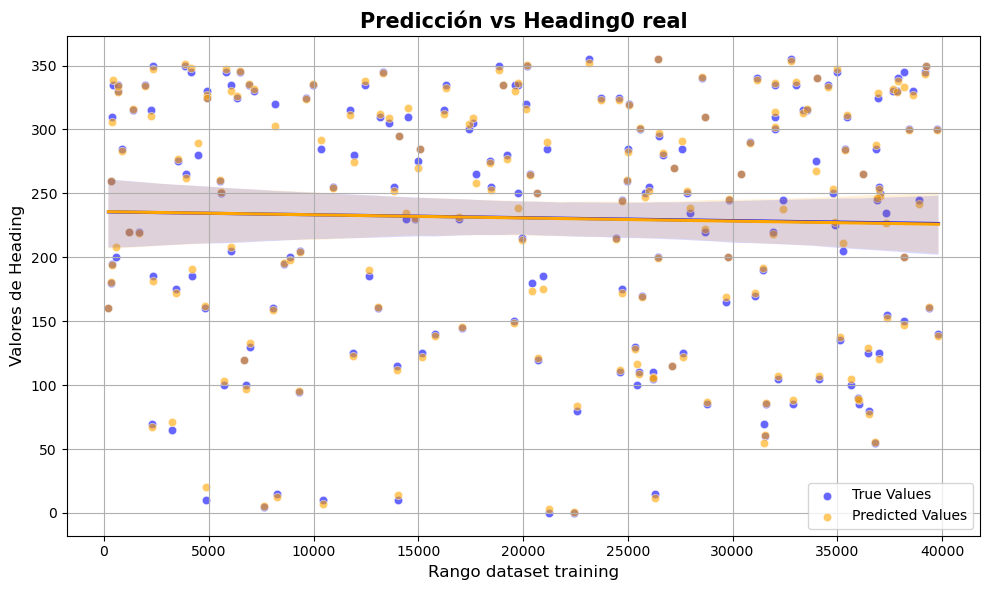

In [89]:
mae_heading0_gb = evaluate_heading_model(heading_model_h0_gb, X_train, y_train, heading0_train, df_raw)

In [90]:
heading0_rf=train_rf_model(X_train, y_train)

Mean Absolute Error for sin_heading0: 0.021838800102966106
Mean Absolute Error for cos_heading0: 0.022210646545298755
Mean Absolute Error para heading0: 1.3966830665617358


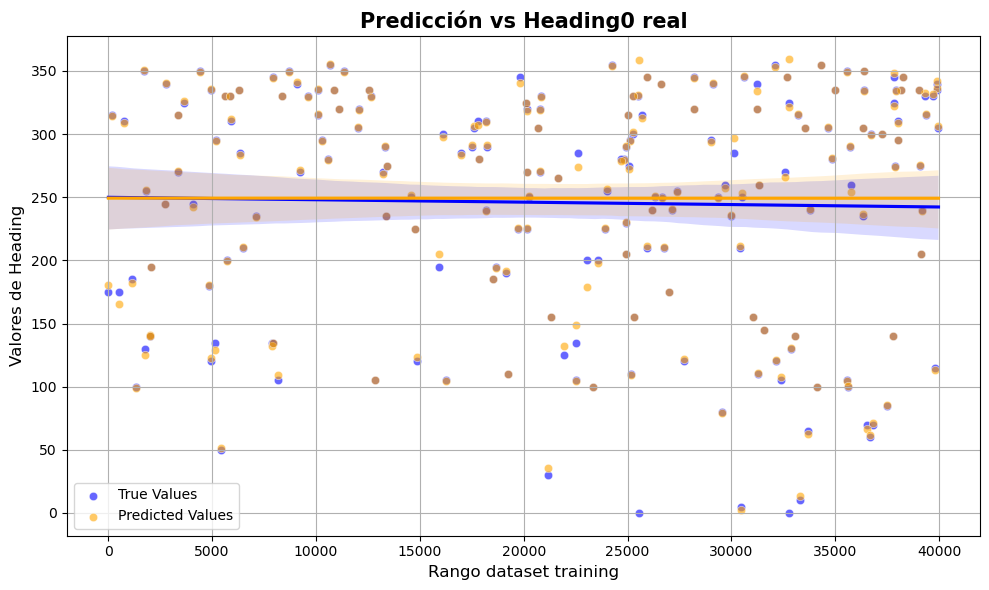

1.3966830665617358

In [91]:
evaluate_heading_model(heading0_rf, X_train, y_train, heading0_train, df_raw)

In [92]:
from sklearn.metrics import mean_squared_error

In [93]:
# Función para calcular el Error Cuadrático Medio (RMSE)
def rmse(model, X_test, y_test, df):

    y_pred = model.predict(X_test)

    # Compute metrics
    rmse_sin =  np.sqrt(mean_squared_error(y_test['heading0_sin'], y_pred[:, 1]))
    rmse_cos =  np.sqrt(mean_squared_error(y_test['heading0_cos'], y_pred[:, 0]))

    print(f'RMSE for sin_heading0: {rmse_sin}')
    print(f'RMSE for cos_heading0: {rmse_cos}')

    # Compute the angle using arctan2
    angle_radians = np.arctan2(y_pred[:, 1], y_pred[:, 0])
    angle_degrees = np.degrees(angle_radians)
    angle_degrees_predicted = (angle_degrees + 360) % 360
    predicted_diff = np.where(angle_degrees_predicted > 180, 360 - angle_degrees_predicted, angle_degrees_predicted)

    # Las dos siguientes líneas son necesarias, porque el modelo puede predecir valores de ángulos que cuenten de 0 hacia la izquierda
    # (-90º -> 270)
    diff = np.abs(df.loc[y_test.index].heading0 - angle_degrees_predicted)
    angular_diff = np.where(diff > 180, 360 - diff, diff)

    y_test_angles = df.loc[y_test.index].heading0
    y_test_diff = np.where(y_test_angles > 180, 360 - y_test_angles, y_test_angles)

    
    rmse_ = np.sqrt(mean_squared_error(predicted_diff,y_test_diff))
    print("rmse heading0: ", rmse_)

In [94]:
rmse(heading_model_h0_gb, X_train, y_train, df_raw)

RMSE for sin_heading0: 0.08621623831674158
RMSE for cos_heading0: 0.0809967533583964
rmse heading0:  5.7281382939670475


In [95]:
#save_model("heading0_model", heading_model)

In [96]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

In [97]:
# Stratified k-fold cross-validation
def cross_validation(model):
    
    scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv = 12, scoring = "neg_mean_squared_error"))
    mean = np.mean(scores)
    print("Mean CV score: ",mean)

In [98]:
cross_validation(heading_model_h0_gb)

Mean CV score:  0.13089907119404973


##### Para poder comparar con los siguientes modelos de predicción de x0 e y0, vamos a extraer esas coordenadas relacionadas a nuestro heading 0 predicho en este modelo, y calcular el MAE y RMSE para esos dos. Luego probaremos con modelos distintos (que usen distintos predictores) para calcular x0 e y0, evaluarlos con MAE y RMSE, y compararlos entre ellos y con este primer modelo

#### TRANSFORMAMOS EL SIN HEADING0 Y COS HEADING0 EN LAS COORDENADAS X0 E Y0 PARA CALCULAR EL ERROR

In [99]:
y_pred_heading0 = heading_model_h0_gb.predict(X_train)

sin_heading0 = y_pred_heading0[:, 1]
cos_heading0 = y_pred_heading0[:,0]

heading0_radians = np.arctan2(sin_heading0, cos_heading0)
heading0_degrees = np.degrees(heading0_radians)
heading0_predicted = (heading0_degrees + 360) % 360

x0_pred = (100 + (284.6/2)) * np.cos(np.radians(180) - np.radians(heading0_predicted)) +765
y0_pred = (100 + (284.6/2)) * np.sin(np.radians(180) - np.radians(heading0_predicted)) - 1170

In [100]:
x0_train = list(df_input["x0"])
y0_train = list(df_input["y0"])

In [101]:
mae_x0 = mean_absolute_error(x0_train, x0_pred)
mae_y0 = mean_absolute_error(y0_train, y0_pred)
dist = np.sqrt(np.square(x0_pred - x0_train) + np.square(y0_pred - y0_train))

print(f'Mean Absolute Error for x0: {mae_x0}')
print(f'Mean Absolute Error for y0: {mae_y0}')
print(f'Mean Absolute Error for dist real vs pred: {dist.mean()}')

Mean Absolute Error for x0: 8.135126535855525
Mean Absolute Error for y0: 8.035474223428485
Mean Absolute Error for dist real vs pred: 12.691588657934556


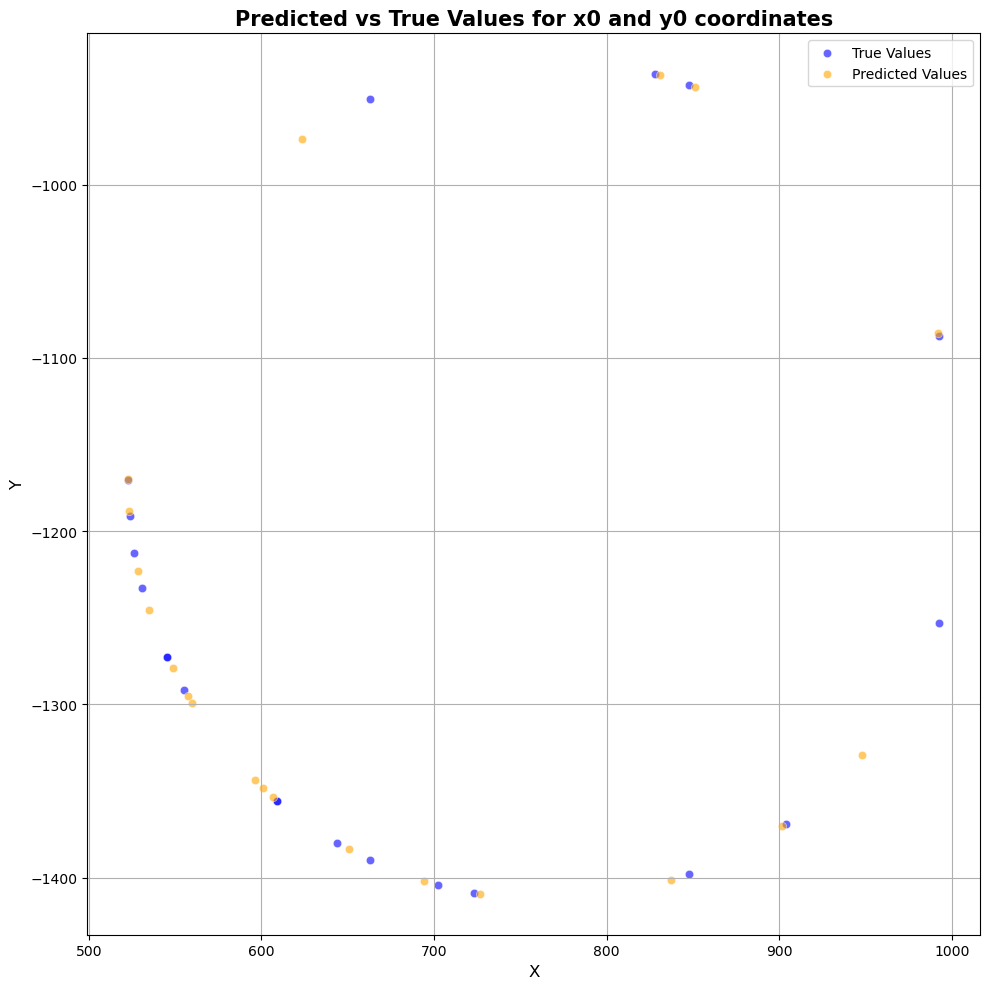

In [102]:
df_plot = pd.DataFrame({"x0_real": x0_train, "y0_real": y0_train, "x0_pred": x0_pred, "y0_pred": y0_pred})

plt.figure(figsize=(10, 10))

plot_sample = df_plot.sample(20)

# Plot true values
sns.scatterplot(x='x0_real', y='y0_real', data=plot_sample, color='blue', label='True Values', alpha=0.6)

# Plot predicted values
sns.scatterplot(x='x0_pred', y='y0_pred', data=plot_sample, color='orange', label='Predicted Values', alpha=0.6)

# Enhance the plot
plt.title('Predicted vs True Values for x0 and y0 coordinates', fontsize=15, fontweight='bold')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

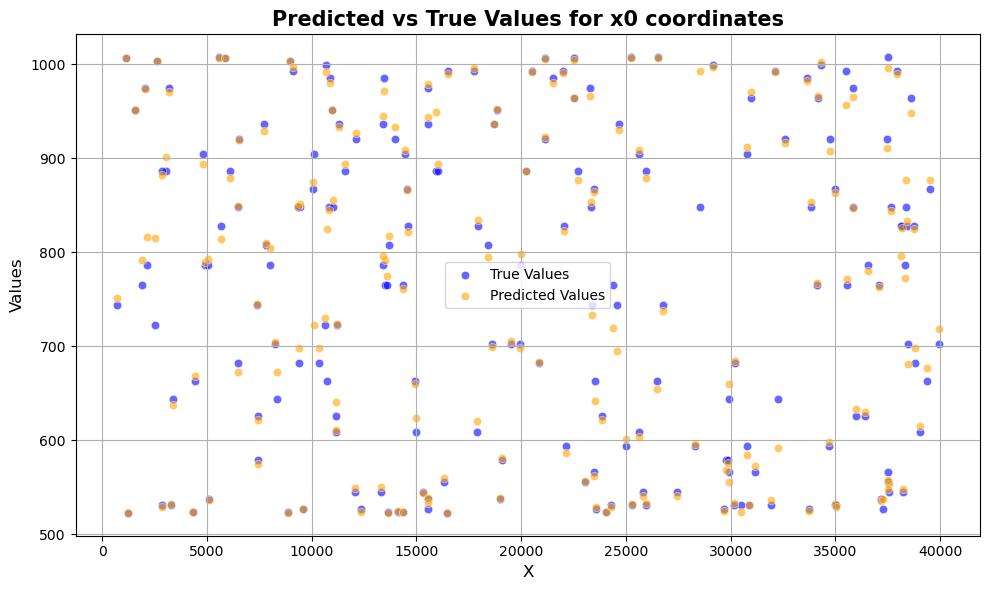

In [103]:
df_plot = pd.DataFrame({"x": range(len(x0_train)), "x0_real": x0_train, "x0_pred": x0_pred})

plt.figure(figsize=(10, 6))

plot_sample = df_plot.sample(200)

# Plot true values
sns.scatterplot(x='x', y='x0_real', data=plot_sample, color='blue', label='True Values', alpha=0.6)

# Plot predicted values
sns.scatterplot(x='x', y='x0_pred', data=plot_sample, color='orange', label='Predicted Values', alpha=0.6)

# Enhance the plot
plt.title('Predicted vs True Values for x0 coordinates', fontsize=15, fontweight='bold')
plt.xlabel('X', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

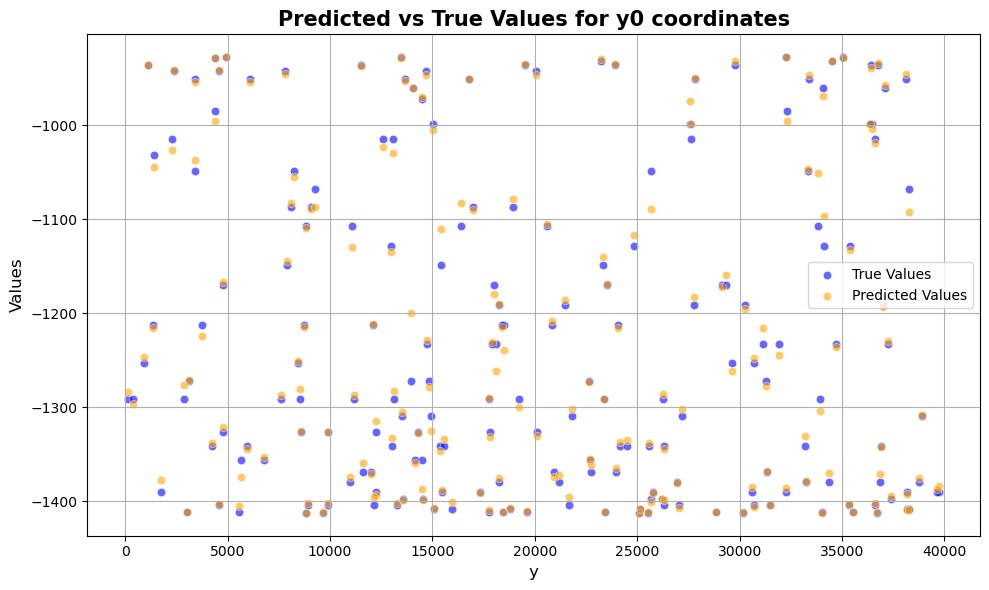

In [104]:
df_plot = pd.DataFrame({"y": range(len(y0_train)), "y0_real": y0_train, "y0_pred": y0_pred})

plt.figure(figsize=(10, 6))

plot_sample = df_plot.sample(200)

# Plot true values
sns.scatterplot(x='y', y='y0_real', data=plot_sample, color='blue', label='True Values', alpha=0.6)

# Plot predicted values
sns.scatterplot(x='y', y='y0_pred', data=plot_sample, color='orange', label='Predicted Values', alpha=0.6)

# Enhance the plot
plt.title('Predicted vs True Values for y0 coordinates', fontsize=15, fontweight='bold')
plt.xlabel('y', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

##### MODEL 1.2 - x0 e y0 HistGradBoostRegressor

##### MODEL 1.2 - Heading0 RandomForestRegressor

In [105]:
# Train and evaluate the heading model
heading_model_h0_rf = train_rf_model(X_train, y_train)

Mean Absolute Error for sin_heading0: 0.0587790623671341
Mean Absolute Error for cos_heading0: 0.06055627193748389
Mean Absolute Error para heading0: 5.189327491284888


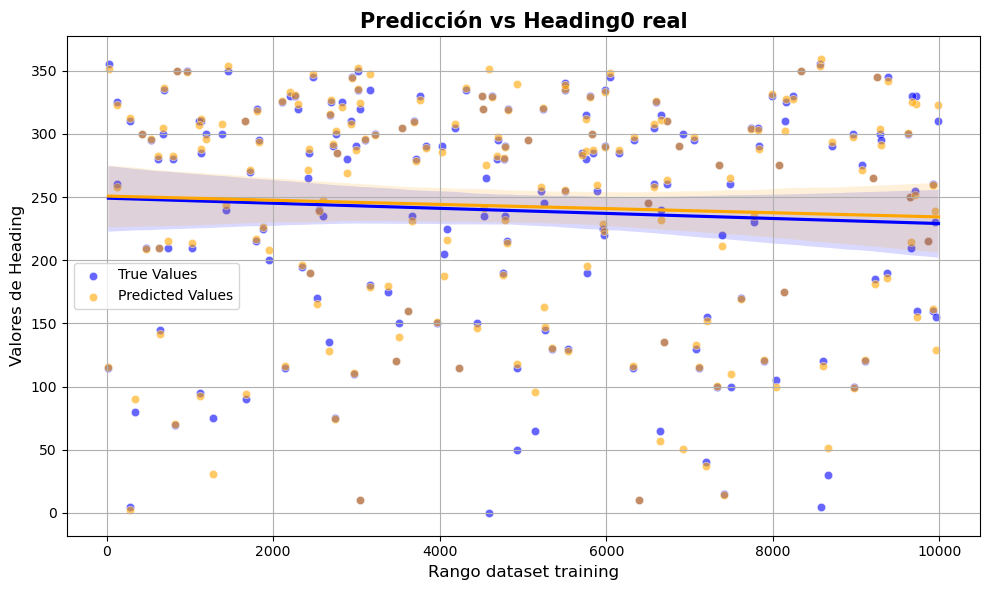

In [107]:
mae_heading0_rf = evaluate_heading_model(heading_model_h0_rf, X_test, y_test, heading0_test, df_raw)

### Análisis de predictores para x0 e y0

#### MODEL 3: DRIFT PREDICTION

##### FIRST WE WILL USE THE SAME PROCEDURE

In [108]:
# WE PREDICT HEADING0 AND SAVE IT IN THE TRAINING DATASET

heading0_pred = heading_model_h0_gb.predict(X_train)
y_train_model2 = y_train.copy()
X_train_model2 = X_train.copy()

# Compute metrics
X_train_model2['pred_heading0_sin'] =  heading0_pred[:, 1]
X_train_model2['pred_heading0_cos'] =  heading0_pred[:, 0]

In [109]:
X_train_model2

WindDir_cos  WindDir_sin  WaveDir_cos  WaveDir_sin  CurrDir_cos  \
39087     0.802755    -0.596309    -0.349095     0.937087    -0.850499   
30893     0.322695    -0.946503    -0.901516    -0.432747     0.532817   
45278    -0.325634     0.945496    -0.229251     0.973367    -0.074787   
16398    -0.038859     0.999245    -0.318480     0.947930    -0.070070   
13653     0.798383    -0.602150     0.904842    -0.425748    -0.789352   
...            ...          ...          ...          ...          ...   
11284     0.893575    -0.448914     0.911669    -0.410926    -0.980580   
44732     0.912599     0.408856     0.934751     0.355303     0.235600   
38158     0.484336    -0.874882     0.594767     0.803898    -0.976597   
860      -0.593419     0.804894    -0.971764     0.235956    -0.716387   
15795    -0.124589     0.992208    -0.677261     0.735743    -0.474718   

       CurrDir_sin  WindDir  WaveDir  CurrDir  WindSpeed  WaveHs  WaveTp  \
39087    -0.525976  323.394  110.432  211.734      5.365   1.654  12.373   
30893     0.846230  288.826  205.642   57.804      5.764   1.289   5.872   
45278     0.997200  109.004  103.253   94.289     10.673   3.229   8.585   
16398     0.997542   92.227  108.571   94.018      3.814   1.286  11.986   
13653     0.613941  322.976  334.802  142.125      7.442   0.947   4.248   
...            ...      ...      ...      ...        ...     ...     ...   
11284     0.196117  333.326  335.737  168.690      6.590   1.128   5.773   
44732     0.971850   24.133   20.812   76.373     12.339   4.152  10.312   
38158    -0.215076  298.969   53.504  192.420      2.000   0.346   4.889   
860       0.697703  126.400  166.352  135.757      5.038   2.166  12.593   
15795     0.880138   97.157  132.630  118.341      8.555   1.310  10.895   

       CurrSpeed  pred_heading0_sin  pred_heading0_cos  
39087      0.104          -0.587125          -0.019053  
30893      0.447           0.525189           0.228821  
45278      0.140          -0.957461           0.254128  
16398      0.283          -0.973117           0.163303  
13653      0.186           0.535675          -0.853806  
...          ...                ...                ...  
11284      0.155           0.413645          -0.901627  
44732      0.159          -0.404943          -0.910988  
38158      0.201           0.370219           0.975357  
860        0.187          -0.511059           0.852888  
15795      0.337          -0.930031           0.364957  

[40000 rows x 15 columns]

In [110]:
# Define predictor and target columns
# predictor_cols = predictor_cols = [
#     "WindSpeed", "WindDir", "cos_WindDir", "sin_WindDir", "WaveHs", "WaveTp", 
#     "WaveDir", "cos_WaveDir", "sin_WaveDir", "CurrDir", "cos_CurrDir", "sin_CurrDir",
#     "CurrSpeed" ,
#     "sin_heading0_pred",  "cos_heading0_pred", "heading0_pred"]

target_cols = ["x_closest", "y_closest"]

y_train_model2 = y_train.copy() 

In [111]:
y_train_model2[target_cols] = df_input[target_cols]
y_train_model2.drop(["heading0_sin"], inplace=True, axis=1)
y_train_model2.drop(["heading0_cos"], inplace=True, axis=1)

y_train_model2

x_closest  y_closest
39087    765.030  -1412.680
30893    756.016   -658.863
45278    702.318  -1404.424
16398    722.955  -1408.999
13653    963.511  -1031.402
...          ...        ...
11284    984.628  -1067.979
44732    984.628  -1272.780
38158   -283.038   -259.717
860      160.979  -1350.081
15795    682.159  -1398.068

[40000 rows x 2 columns]

In [112]:
# Train the model
drift_pred = train_hgbr_model(X_train_model2, y_train_model2)

In [113]:
drift_hgb = drift_pred

MAE para x: 27.852450810328214
MAE para y: 22.26008396381972
MAE para d: 18.840690321369294


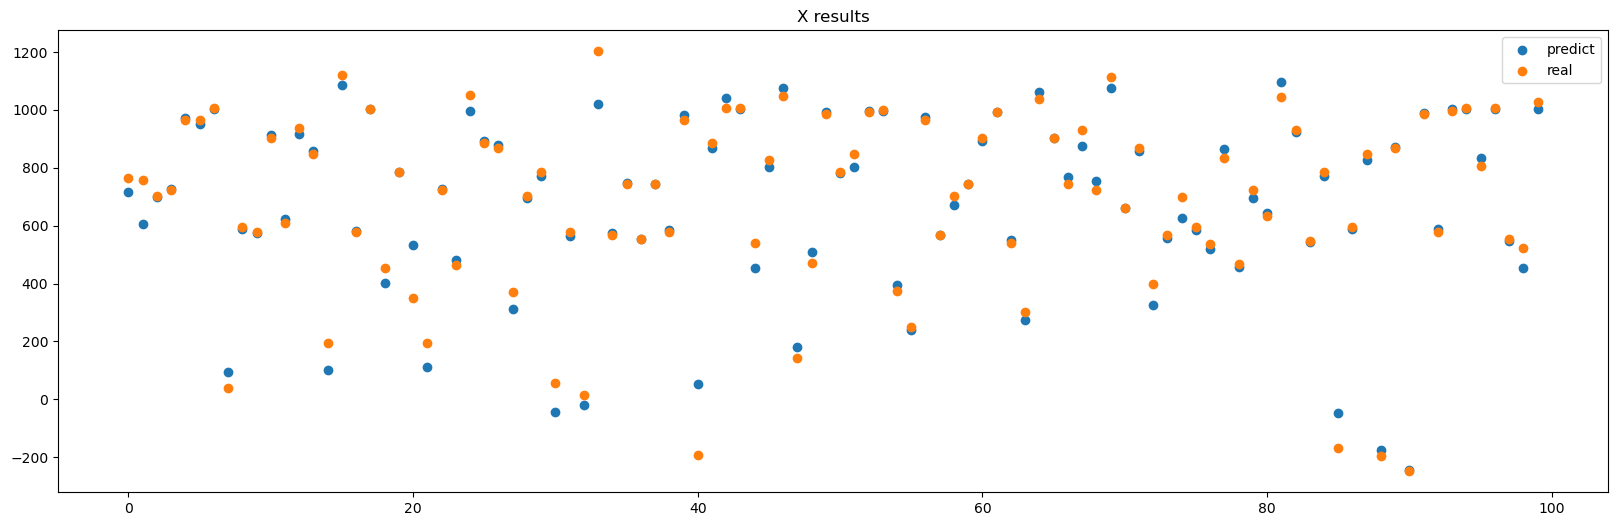

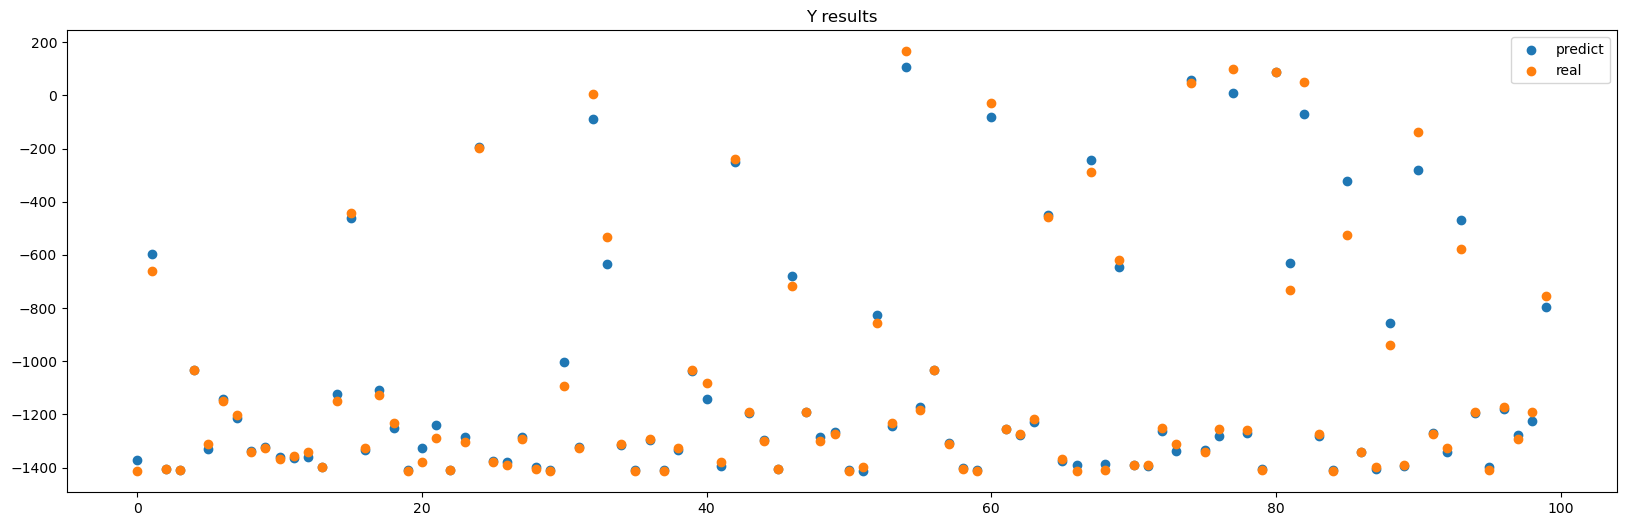

In [114]:
evaluate_drift_model(drift_hgb, X_train_model2, y_train_model2)

In [115]:
drift_rf=train_rf_model(X_train_model2, y_train_model2)

MAE para x: 11.459166460250042
MAE para y: 9.634892740625045
MAE para d: 8.001639337172138


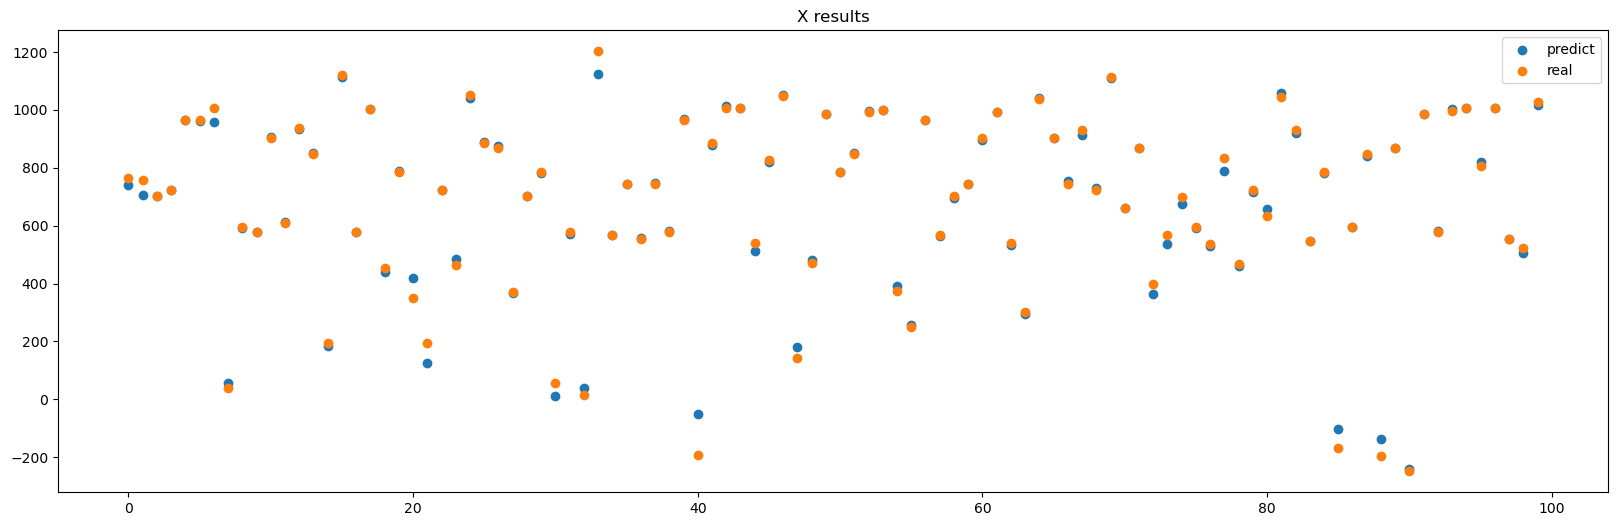

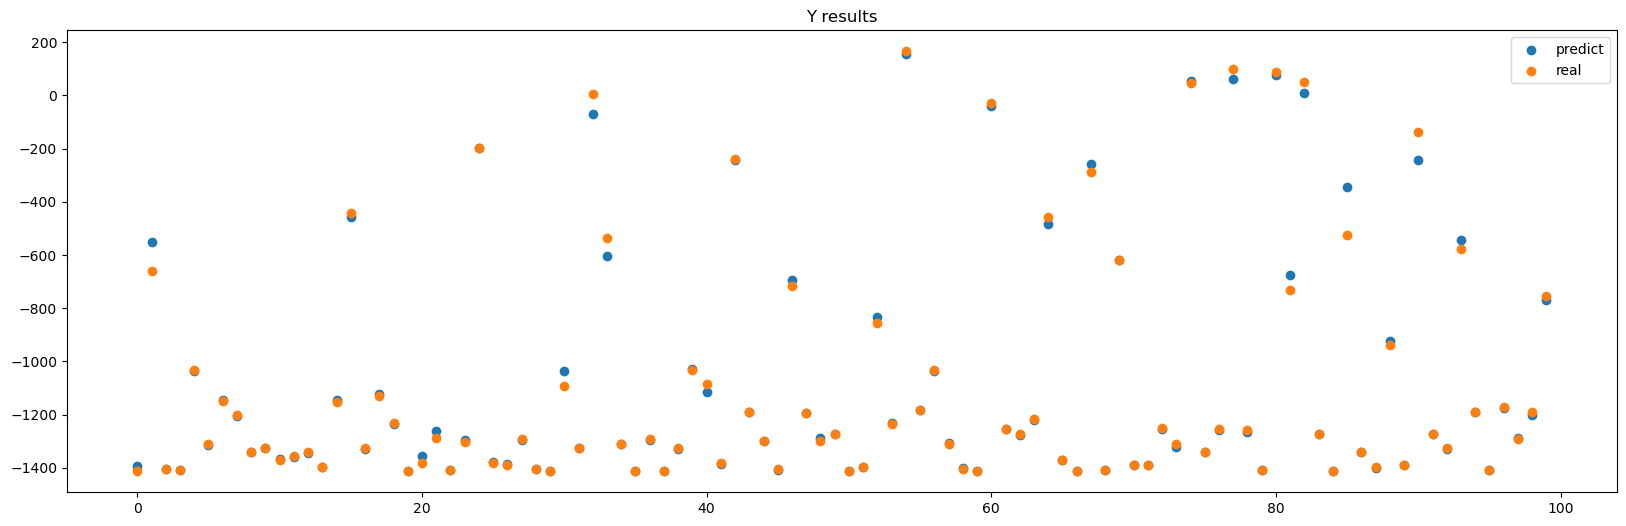

In [116]:
evaluate_drift_model(drift_rf, X_train_model2, y_train_model2)

##### LET'S TRY WITH A RANDOM FOREST

# EVALUACIÓN DE LOS MODELOS

### Primero vamos a recuperar todos los modelos entrenados anteriormente

In [117]:
modelos1 = [lr_simple, lasso_model, heading_model_h0_gb, heading0_rf]
modelos2 = [drift_hgb, drift_rf]

### Recuperemos las métricas para la tabla

In [118]:
# PRIMERO LA FUNCIÓN DEL MAE PARA HEADING0
def mae_heading0(y_pred, y_test, df):
    
    # Compute the angle using arctan2
    angle_radians = np.arctan2(y_pred[:, 1], y_pred[:, 0])
    angle_degrees = np.degrees(angle_radians)
    angle_degrees_predicted = (angle_degrees + 360) % 360
    
    diff = np.abs(df.loc[y_test.index].heading0 - angle_degrees_predicted)
    angular_diff = np.where(diff > 180, 360 - diff, diff)
    
    mae_heading0 = np.mean(angular_diff)
    print(f'Mean Absolute Error para heading0: {mae_heading0}')
    return mae_heading0

In [119]:
# Función para calcular el Error Cuadrático Medio (RMSE)
def rmse_heading0(y_pred, y_test, df):

    # Compute the angle using arctan2
    angle_radians = np.arctan2(y_pred[:, 1], y_pred[:, 0])
    angle_degrees = np.degrees(angle_radians)
    angle_degrees_predicted = (angle_degrees + 360) % 360
    predicted_diff = np.where(angle_degrees_predicted > 180, 360 - angle_degrees_predicted, angle_degrees_predicted)

    # Las dos siguientes líneas son necesarias, porque el modelo puede predecir valores de ángulos que cuenten de 0 hacia la izquierda
    # (-90º -> 270)


    y_test_angles = df.loc[y_test.index].heading0
    y_test_diff = np.where(y_test_angles > 180, 360 - y_test_angles, y_test_angles)

    
    rmse_ = np.sqrt(mean_squared_error(predicted_diff,y_test_diff))
    print("rmse heading0: ", rmse_)
    return rmse_

### Ahora recuperamos los datos de test (para ambos modelos, cuyas variables de entrada y salida difieren)

In [120]:
# VARIABLES DE ENTRADA PARA HEADING0
X_test

WindDir_cos  WindDir_sin  WaveDir_cos  WaveDir_sin  CurrDir_cos  \
33553    -0.276090     0.961132    -0.461516     0.887132    -0.318810   
9427     -0.987860     0.155348    -0.874188     0.485588    -0.088547   
199      -0.632854     0.774271    -0.607667     0.794192     0.978455   
12447     1.000000     0.000908     0.597373    -0.801963     0.865064   
39489    -0.481937    -0.876206    -0.701618     0.712553    -0.894428   
...            ...          ...          ...          ...          ...   
28567    -0.839999     0.542588    -0.931926     0.362649    -0.986077   
25079    -0.999660     0.026072    -0.993876    -0.110498     0.660474   
18707    -0.410289    -0.911955     0.042469    -0.999098    -0.821368   
15200     0.995319    -0.096645     0.636415     0.771347     0.199813   
5857      0.462414     0.886664     0.716740    -0.697340    -0.854595   

       CurrDir_sin  WindDir  WaveDir  CurrDir  WindSpeed  WaveHs  WaveTp  \
33553     0.947819  106.027  117.485  108.591      8.046   1.927   9.211   
9427      0.996072  171.063  150.949   95.080     12.295   1.506   4.797   
199      -0.206460  129.261  127.421  348.085     11.912   3.398   9.136   
12447     0.501662    0.052  306.682   30.110      5.397   0.668   4.696   
39489    -0.447213  241.188  134.557  206.565      2.000   1.751  10.098   
...            ...      ...      ...      ...        ...     ...     ...   
28567     0.166287  147.140  158.737  170.428     13.743   3.343  10.089   
25079    -0.750849  178.506  186.344  311.336      4.155   2.089   9.578   
18707     0.570398  245.777  272.434  145.222      4.677   1.660   6.669   
15200     0.979834  354.454   50.475   78.474      6.304   0.731  10.168   
5857      0.519295   62.457  315.786  148.715      2.068   1.126   5.405   

       CurrSpeed  
33553      0.271  
9427       0.158  
199        0.130  
12447      0.295  
39489      0.117  
...          ...  
28567      0.302  
25079      0.168  
18707      0.205  
15200      0.304  
5857       0.285  

[10000 rows x 13 columns]

In [121]:
# VARIABLES DE SALIDA PARA HEADING0
y_test

heading0_cos  heading0_sin
33553      0.342020 -9.396926e-01
9427       0.965926 -2.588190e-01
199        0.573576 -8.191520e-01
12447     -1.000000  1.224647e-16
39489      0.819152 -5.735764e-01
...             ...           ...
28567      0.906308 -4.226183e-01
25079      0.984808  1.736482e-01
18707      0.173648  9.848078e-01
15200     -0.819152 -5.735764e-01
5857       0.819152 -5.735764e-01

[10000 rows x 2 columns]

### Luego ejecutamos el HGB y guardamos el heading predicho en los X_test para el siguiente modelo

In [122]:
# WE PREDICT HEADING0 AND SAVE IT IN THE TRAINING DATASET
y_test_model2_hgb = y_test.copy()
X_test_model2_hgb = X_test.copy()
heading0_pred = heading_model_h0_gb.predict(X_test)

# Compute metrics
X_test_model2_hgb['pred_heading0_sin'] =  heading0_pred[:, 1]
X_test_model2_hgb['pred_heading0_cos'] =  heading0_pred[:, 0]

In [123]:
y_test_model2_hgb["x_closest"] = df_raw.loc[y_test.index].x_closest
y_test_model2_hgb["y_closest"] = df_raw.loc[y_test.index].y_closest
y_test_model2_hgb.drop(["heading0_sin"], inplace=True, axis=1)
y_test_model2_hgb.drop(["heading0_cos"], inplace=True, axis=1)
y_test_model2_hgb

x_closest  y_closest
33553    682.159  -1398.068
9427     461.237  -1257.093
199      626.052  -1368.861
12447   1007.330  -1170.380
39489    566.549  -1309.358
...          ...        ...
28567    545.432  -1272.780
25079    -47.055  -1125.365
18707    637.238    122.452
15200    963.511  -1309.358
5857     689.151  -1051.709

[10000 rows x 2 columns]

### Obtener el MAE, RMSE y CV del heading0 para HGB

In [124]:
mae_heading0_hgb =  mae_heading0(heading0_pred, y_test, df_raw)

Mean Absolute Error para heading0: 4.755898478972615


In [125]:
rmse_heading0_hgb = rmse_heading0(heading0_pred, y_test, df_raw)

rmse heading0:  11.20313918154452


### Hacemos lo mismo con el RF

In [126]:
y_test_model2_rf = y_test.copy()
X_test_model2_rf = X_test.copy()
heading0_pred_rf = heading0_rf.predict(X_test)


# Compute metrics
X_test_model2_rf['pred_heading0_sin'] =  heading0_pred_rf[:, 1]
X_test_model2_rf['pred_heading0_cos'] =  heading0_pred_rf[:, 0]

In [127]:
y_test_model2_rf["x_closest"] = df_raw.loc[y_test.index].x_closest
y_test_model2_rf["y_closest"] = df_raw.loc[y_test.index].y_closest
y_test_model2_rf.drop(["heading0_sin"], inplace=True, axis=1)
y_test_model2_rf.drop(["heading0_cos"], inplace=True, axis=1)

y_test_model2_rf

x_closest  y_closest
33553    682.159  -1398.068
9427     461.237  -1257.093
199      626.052  -1368.861
12447   1007.330  -1170.380
39489    566.549  -1309.358
...          ...        ...
28567    545.432  -1272.780
25079    -47.055  -1125.365
18707    637.238    122.452
15200    963.511  -1309.358
5857     689.151  -1051.709

[10000 rows x 2 columns]

In [128]:
mae_heading0_rf =  mae_heading0(heading0_pred_rf, y_test, df_raw)

Mean Absolute Error para heading0: 5.189327491284888


In [129]:
rmse_heading0_rf = rmse_heading0(heading0_pred_rf, y_test, df_raw)

rmse heading0:  11.863993091993764


### Definimos la función para obtener MAE,RMSE del drift model

In [130]:
def mae_d(y_pred, y_test):

    d_predicted, d_real = np.linalg.norm(y_pred, axis=1), np.linalg.norm(y_test, axis=1)
    mae_d = mean_absolute_error(d_predicted, d_real)
    
    print(f'MAE para d: {mae_d}')
    return mae_d

In [131]:
def rmse_d(y_pred, y_test):

    d_predicted, d_real = np.linalg.norm(y_pred, axis=1), np.linalg.norm(y_test, axis=1)
    rmse_d = np.sqrt(mean_squared_error(d_predicted, d_real))
    
    print(f'rmse para d: {rmse_d}')
    return rmse_d

### Y a predecir para el modelo de drift

In [132]:
drift_pred_hgb = drift_hgb.predict(X_test_model2_hgb)

In [133]:
drift_pred_rf = drift_rf.predict(X_test_model2_rf)

In [134]:
mae_drift_hgb = mae_d(drift_pred_hgb, y_test_model2_hgb)

MAE para d: 28.251204019876884


In [135]:
mae_drift_rf = mae_d(drift_pred_rf, y_test_model2_rf)

MAE para d: 30.257483854588738


In [136]:
rmse_drift_hgb = rmse_d(drift_pred_hgb, y_test_model2_hgb)

rmse para d: 78.51746541396004


In [137]:
rmse_drift_rf = rmse_d(drift_pred_rf, y_test_model2_rf)

rmse para d: 87.05055208699926


### Construimos la tabla en un DF de pandas

In [ ]:
# PREDICT LINEAR REGRESSION SIMPLE
y_pred = lr_simple.predict(X_test)
    

# Compute the angle using arctan2
angle_radians = np.arctan2(y_pred[:, 1], y_pred[:, 0])
angle_degrees = np.degrees(angle_radians)
angle_degrees_predicted = (angle_degrees + 360) % 360


diff = np.abs(df_raw.loc[y_train.index].heading0 - angle_degrees_predicted)
angular_diff = np.where(diff > 180, 360 - diff, diff)

mae_heading0 = np.mean(angular_diff)
print(f'Mean Absolute Error Linear Regression para heading0: {mae_heading0}')

In [139]:
resultados_heading0 = {"modelos": ["Hist Grandient Boosting Regressor", "Random Forest Regressor"], "MAE": [mae_heading0_hgb, mae_heading0_rf], "RMSE": [rmse_heading0_hgb, rmse_heading0_rf]}

In [140]:
resultados_heading0_df = pd.DataFrame(data = resultados_heading0, index = [0,1])

In [141]:
resultados_heading0_df

modelos       MAE       RMSE
0  Hist Grandient Boosting Regressor  4.755898  11.203139
1            Random Forest Regressor  5.189327  11.863993